# Computer Vision Course Project
# Project Title: Indoor Object Detection (Chair, Sofa, Wardrobe)


# Step 1 : Problem Statement:

#  Step 2: Importing Necessary Libraries:

In [1]:
import numpy as np                                    # to perform a wide variety of mathematical operations on arrays.                                             
import pandas as pd                                   # Pandas is used to analyze data.

import os                                             # a portable way of using operating system dependent functionality.
import csv                                            # implements classes to read and write tabular data in CSV format.
import cv2                                            # for image processing and performing computer vision tasks.
import pickle                                         # to dump and load data
import seaborn as sns                                 # for making statistical graphics

from skimage.io import imread                         # to read an image 
from skimage.transform import resize                  # It is used to Warp an image according to a given coordinate transformation. 
import matplotlib.pyplot as plt                       # plotting

from sklearn.model_selection import train_test_split  # to split data in training and testing
from sklearn.metrics import classification_report     # to get classification report
import sklearn.metrics as metrics                     # get all metrices functions
from sklearn.metrics import accuracy_score            # to compute accuracy


from sklearn.metrics import confusion_matrix          # to get confusion matrix for testing data
from datetime import datetime                         # to calculate time
from sklearn import linear_model               

from sklearn.cluster import KMeans                    # to import Kmeans Clusterring
from sklearn.model_selection import GridSearchCV      # to import Grid method for training
from sklearn.neighbors import KNeighborsClassifier    # to import KNN
from sklearn.svm import LinearSVC                     # to import SVC with linear kernel
from sklearn.svm import SVC                           # to import SVC
from sklearn.tree import DecisionTreeClassifier       # to import Decision tree classifier
from sklearn.ensemble import RandomForestClassifier   # to import random forest classifier
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold    
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer          # to normalize sift feature extracted 

In [2]:
# Directory to all folders
# Negative_folder = r'D:\A71_CHINMAY\sem5\cv\course_project\Dataset\negative'
Positive_folder =r'D:\A71_CHINMAY\sem5\cv\course_project\Dataset\positive'
Chair_folder = r'D:\A71_CHINMAY\sem5\cv\course_project\Dataset\positive\chair'
Sofa_folder = r'D:\A71_CHINMAY\sem5\cv\course_project\Dataset\positive\sofa'
Wadrobe_folder = r'D:\A71_CHINMAY\sem5\cv\course_project\Dataset\positive\wadrobe'

# Step 3 - Data Preprocessing & SIFT feature Description

In [4]:
i=0                                                      # counter
for filename in os.listdir(Chair_folder):                # to iterate through all images in list created by os.listdir()
    #path
    path=os.path.join(Chair_folder,filename)             # add the path of image to base folder to point to that image
    a=cv2.imread(path)                                   # Read image
    
    #resize image
    resize=(400,400)                                     # resizing parameter
    img=cv2.resize(a,resize)                             # resize image
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)         # convert image to gray scale
    #gray = cv2.medianBlur(img, 5)                        # noise filtration
    
    sift = cv2.SIFT_create()                             #initialise sift descriptor
    keypoints, descriptors = sift.detectAndCompute(gray, None)   # extract keypoints and their description

    out=pd.DataFrame(descriptors)                        #convert the descriptor array into a dataframe format

    print("descriptor shape ",i," : ", out.shape)        # print length of description of that particular image
    i=i+1                                                # increment counter
    #append to the csv file
    csv_data=out.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\sift1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (53, 128)
descriptor shape  1  :  (188, 128)
descriptor shape  2  :  (86, 128)
descriptor shape  3  :  (506, 128)
descriptor shape  4  :  (76, 128)
descriptor shape  5  :  (678, 128)
descriptor shape  6  :  (239, 128)
descriptor shape  7  :  (63, 128)
descriptor shape  8  :  (313, 128)
descriptor shape  9  :  (129, 128)
descriptor shape  10  :  (137, 128)
descriptor shape  11  :  (113, 128)
descriptor shape  12  :  (284, 128)
descriptor shape  13  :  (407, 128)
descriptor shape  14  :  (156, 128)
descriptor shape  15  :  (171, 128)
descriptor shape  16  :  (1947, 128)
descriptor shape  17  :  (176, 128)
descriptor shape  18  :  (275, 128)
descriptor shape  19  :  (263, 128)
descriptor shape  20  :  (134, 128)
descriptor shape  21  :  (146, 128)
descriptor shape  22  :  (535, 128)
descriptor shape  23  :  (416, 128)
descriptor shape  24  :  (749, 128)
descriptor shape  25  :  (991, 128)
descriptor shape  26  :  (478, 128)
descriptor shape  27  :  (285, 128)
descr

descriptor shape  225  :  (251, 128)
descriptor shape  226  :  (1434, 128)
descriptor shape  227  :  (135, 128)
descriptor shape  228  :  (150, 128)
descriptor shape  229  :  (816, 128)
descriptor shape  230  :  (189, 128)
descriptor shape  231  :  (396, 128)
descriptor shape  232  :  (2336, 128)
descriptor shape  233  :  (459, 128)
descriptor shape  234  :  (283, 128)
descriptor shape  235  :  (597, 128)
descriptor shape  236  :  (934, 128)
descriptor shape  237  :  (410, 128)
descriptor shape  238  :  (819, 128)
descriptor shape  239  :  (283, 128)
descriptor shape  240  :  (719, 128)
descriptor shape  241  :  (190, 128)
descriptor shape  242  :  (287, 128)
descriptor shape  243  :  (487, 128)
descriptor shape  244  :  (129, 128)
descriptor shape  245  :  (77, 128)
descriptor shape  246  :  (2373, 128)
descriptor shape  247  :  (2148, 128)
descriptor shape  248  :  (2025, 128)
descriptor shape  249  :  (164, 128)
descriptor shape  250  :  (120, 128)
descriptor shape  251  :  (2088, 1

descriptor shape  448  :  (171, 128)
descriptor shape  449  :  (324, 128)
descriptor shape  450  :  (536, 128)
descriptor shape  451  :  (151, 128)
descriptor shape  452  :  (633, 128)
descriptor shape  453  :  (145, 128)
descriptor shape  454  :  (196, 128)
descriptor shape  455  :  (233, 128)
descriptor shape  456  :  (385, 128)
descriptor shape  457  :  (393, 128)
descriptor shape  458  :  (393, 128)
descriptor shape  459  :  (189, 128)
descriptor shape  460  :  (319, 128)
descriptor shape  461  :  (194, 128)
descriptor shape  462  :  (446, 128)
descriptor shape  463  :  (204, 128)
descriptor shape  464  :  (443, 128)
descriptor shape  465  :  (979, 128)
descriptor shape  466  :  (179, 128)
descriptor shape  467  :  (227, 128)
descriptor shape  468  :  (374, 128)
descriptor shape  469  :  (616, 128)
descriptor shape  470  :  (191, 128)
descriptor shape  471  :  (600, 128)
descriptor shape  472  :  (173, 128)
descriptor shape  473  :  (192, 128)
descriptor shape  474  :  (280, 128)
d

descriptor shape  670  :  (84, 128)
descriptor shape  671  :  (972, 128)
descriptor shape  672  :  (405, 128)
descriptor shape  673  :  (497, 128)
descriptor shape  674  :  (320, 128)
descriptor shape  675  :  (503, 128)
descriptor shape  676  :  (677, 128)
descriptor shape  677  :  (242, 128)
descriptor shape  678  :  (185, 128)
descriptor shape  679  :  (203, 128)
descriptor shape  680  :  (206, 128)
descriptor shape  681  :  (362, 128)
descriptor shape  682  :  (392, 128)
descriptor shape  683  :  (637, 128)
descriptor shape  684  :  (215, 128)
descriptor shape  685  :  (465, 128)
descriptor shape  686  :  (356, 128)
descriptor shape  687  :  (160, 128)
descriptor shape  688  :  (481, 128)
descriptor shape  689  :  (596, 128)
descriptor shape  690  :  (983, 128)
descriptor shape  691  :  (397, 128)
descriptor shape  692  :  (1222, 128)
descriptor shape  693  :  (574, 128)
descriptor shape  694  :  (334, 128)
descriptor shape  695  :  (560, 128)
descriptor shape  696  :  (113, 128)
d

descriptor shape  892  :  (93, 128)
descriptor shape  893  :  (518, 128)
descriptor shape  894  :  (334, 128)
descriptor shape  895  :  (562, 128)
descriptor shape  896  :  (515, 128)
descriptor shape  897  :  (1434, 128)
descriptor shape  898  :  (214, 128)
descriptor shape  899  :  (53, 128)
descriptor shape  900  :  (282, 128)
descriptor shape  901  :  (183, 128)
descriptor shape  902  :  (166, 128)
descriptor shape  903  :  (257, 128)
descriptor shape  904  :  (216, 128)
descriptor shape  905  :  (602, 128)
descriptor shape  906  :  (220, 128)
descriptor shape  907  :  (585, 128)
descriptor shape  908  :  (577, 128)
descriptor shape  909  :  (188, 128)
descriptor shape  910  :  (384, 128)
descriptor shape  911  :  (433, 128)
descriptor shape  912  :  (473, 128)
descriptor shape  913  :  (327, 128)
descriptor shape  914  :  (288, 128)
descriptor shape  915  :  (139, 128)
descriptor shape  916  :  (335, 128)
descriptor shape  917  :  (318, 128)
descriptor shape  918  :  (256, 128)
de

descriptor shape  1111  :  (118, 128)
descriptor shape  1112  :  (282, 128)
descriptor shape  1113  :  (267, 128)
descriptor shape  1114  :  (227, 128)
descriptor shape  1115  :  (318, 128)
descriptor shape  1116  :  (481, 128)
descriptor shape  1117  :  (514, 128)
descriptor shape  1118  :  (165, 128)
descriptor shape  1119  :  (472, 128)
descriptor shape  1120  :  (1049, 128)
descriptor shape  1121  :  (227, 128)
descriptor shape  1122  :  (58, 128)
descriptor shape  1123  :  (171, 128)
descriptor shape  1124  :  (100, 128)
descriptor shape  1125  :  (58, 128)
descriptor shape  1126  :  (217, 128)
descriptor shape  1127  :  (521, 128)
descriptor shape  1128  :  (656, 128)
descriptor shape  1129  :  (200, 128)
descriptor shape  1130  :  (264, 128)
descriptor shape  1131  :  (318, 128)
descriptor shape  1132  :  (151, 128)
descriptor shape  1133  :  (268, 128)
descriptor shape  1134  :  (256, 128)
descriptor shape  1135  :  (133, 128)
descriptor shape  1136  :  (171, 128)
descriptor sh

descriptor shape  1329  :  (506, 128)
descriptor shape  1330  :  (76, 128)
descriptor shape  1331  :  (678, 128)
descriptor shape  1332  :  (239, 128)
descriptor shape  1333  :  (63, 128)
descriptor shape  1334  :  (313, 128)
descriptor shape  1335  :  (368, 128)
descriptor shape  1336  :  (190, 128)
descriptor shape  1337  :  (129, 128)
descriptor shape  1338  :  (137, 128)
descriptor shape  1339  :  (113, 128)
descriptor shape  1340  :  (284, 128)
descriptor shape  1341  :  (156, 128)
descriptor shape  1342  :  (171, 128)
descriptor shape  1343  :  (1947, 128)
descriptor shape  1344  :  (176, 128)
descriptor shape  1345  :  (275, 128)
descriptor shape  1346  :  (263, 128)
descriptor shape  1347  :  (325, 128)
descriptor shape  1348  :  (134, 128)
descriptor shape  1349  :  (146, 128)
descriptor shape  1350  :  (535, 128)
descriptor shape  1351  :  (416, 128)
descriptor shape  1352  :  (991, 128)
descriptor shape  1353  :  (478, 128)
descriptor shape  1354  :  (285, 128)
descriptor sh

descriptor shape  1546  :  (41, 128)
descriptor shape  1547  :  (167, 128)
descriptor shape  1548  :  (223, 128)
descriptor shape  1549  :  (122, 128)
descriptor shape  1550  :  (246, 128)
descriptor shape  1551  :  (251, 128)
descriptor shape  1552  :  (1434, 128)
descriptor shape  1553  :  (135, 128)
descriptor shape  1554  :  (150, 128)
descriptor shape  1555  :  (816, 128)
descriptor shape  1556  :  (189, 128)
descriptor shape  1557  :  (542, 128)
descriptor shape  1558  :  (92, 128)
descriptor shape  1559  :  (396, 128)
descriptor shape  1560  :  (2336, 128)
descriptor shape  1561  :  (459, 128)
descriptor shape  1562  :  (283, 128)
descriptor shape  1563  :  (934, 128)
descriptor shape  1564  :  (410, 128)
descriptor shape  1565  :  (819, 128)
descriptor shape  1566  :  (283, 128)
descriptor shape  1567  :  (719, 128)
descriptor shape  1568  :  (190, 128)
descriptor shape  1569  :  (85, 128)
descriptor shape  1570  :  (287, 128)
descriptor shape  1571  :  (487, 128)
descriptor sh

descriptor shape  1762  :  (202, 128)
descriptor shape  1763  :  (264, 128)
descriptor shape  1764  :  (288, 128)
descriptor shape  1765  :  (338, 128)
descriptor shape  1766  :  (204, 128)
descriptor shape  1767  :  (1050, 128)
descriptor shape  1768  :  (69, 128)
descriptor shape  1769  :  (473, 128)
descriptor shape  1770  :  (71, 128)
descriptor shape  1771  :  (489, 128)
descriptor shape  1772  :  (157, 128)
descriptor shape  1773  :  (171, 128)
descriptor shape  1774  :  (324, 128)
descriptor shape  1775  :  (536, 128)
descriptor shape  1776  :  (151, 128)
descriptor shape  1777  :  (633, 128)
descriptor shape  1778  :  (145, 128)
descriptor shape  1779  :  (215, 128)
descriptor shape  1780  :  (59, 128)
descriptor shape  1781  :  (196, 128)
descriptor shape  1782  :  (233, 128)
descriptor shape  1783  :  (385, 128)
descriptor shape  1784  :  (393, 128)
descriptor shape  1785  :  (189, 128)
descriptor shape  1786  :  (319, 128)
descriptor shape  1787  :  (194, 128)
descriptor sha

descriptor shape  1979  :  (213, 128)
descriptor shape  1980  :  (463, 128)
descriptor shape  1981  :  (823, 128)
descriptor shape  1982  :  (161, 128)
descriptor shape  1983  :  (185, 128)
descriptor shape  1984  :  (136, 128)
descriptor shape  1985  :  (544, 128)
descriptor shape  1986  :  (453, 128)
descriptor shape  1987  :  (56, 128)
descriptor shape  1988  :  (1430, 128)
descriptor shape  1989  :  (171, 128)
descriptor shape  1990  :  (696, 128)
descriptor shape  1991  :  (77, 128)
descriptor shape  1992  :  (103, 128)
descriptor shape  1993  :  (376, 128)
descriptor shape  1994  :  (787, 128)
descriptor shape  1995  :  (84, 128)
descriptor shape  1996  :  (972, 128)
descriptor shape  1997  :  (405, 128)
descriptor shape  1998  :  (497, 128)
descriptor shape  1999  :  (320, 128)
descriptor shape  2000  :  (503, 128)
descriptor shape  2001  :  (155, 128)
descriptor shape  2002  :  (110, 128)
descriptor shape  2003  :  (677, 128)
descriptor shape  2004  :  (242, 128)
descriptor sha

descriptor shape  2196  :  (545, 128)
descriptor shape  2197  :  (287, 128)
descriptor shape  2198  :  (307, 128)
descriptor shape  2199  :  (278, 128)
descriptor shape  2200  :  (159, 128)
descriptor shape  2201  :  (53, 128)
descriptor shape  2202  :  (329, 128)
descriptor shape  2203  :  (360, 128)
descriptor shape  2204  :  (116, 128)
descriptor shape  2205  :  (955, 128)
descriptor shape  2206  :  (1109, 128)
descriptor shape  2207  :  (390, 128)
descriptor shape  2208  :  (173, 128)
descriptor shape  2209  :  (1670, 128)
descriptor shape  2210  :  (171, 128)
descriptor shape  2211  :  (524, 128)
descriptor shape  2212  :  (82, 128)
descriptor shape  2213  :  (87, 128)
descriptor shape  2214  :  (493, 128)
descriptor shape  2215  :  (319, 128)
descriptor shape  2216  :  (259, 128)
descriptor shape  2217  :  (93, 128)
descriptor shape  2218  :  (518, 128)
descriptor shape  2219  :  (334, 128)
descriptor shape  2220  :  (562, 128)
descriptor shape  2221  :  (515, 128)
descriptor sha

descriptor shape  2414  :  (196, 128)
descriptor shape  2415  :  (282, 128)
descriptor shape  2416  :  (142, 128)
descriptor shape  2417  :  (516, 128)
descriptor shape  2418  :  (376, 128)
descriptor shape  2419  :  (183, 128)
descriptor shape  2420  :  (3112, 128)
descriptor shape  2421  :  (204, 128)
descriptor shape  2422  :  (560, 128)
descriptor shape  2423  :  (237, 128)
descriptor shape  2424  :  (384, 128)
descriptor shape  2425  :  (600, 128)
descriptor shape  2426  :  (171, 128)
descriptor shape  2427  :  (200, 128)
descriptor shape  2428  :  (131, 128)
descriptor shape  2429  :  (105, 128)
descriptor shape  2430  :  (110, 128)
descriptor shape  2431  :  (372, 128)
descriptor shape  2432  :  (219, 128)
descriptor shape  2433  :  (161, 128)
descriptor shape  2434  :  (228, 128)
descriptor shape  2435  :  (224, 128)
descriptor shape  2436  :  (130, 128)
descriptor shape  2437  :  (367, 128)
descriptor shape  2438  :  (108, 128)
descriptor shape  2439  :  (117, 128)
descriptor 

descriptor shape  2630  :  (118, 128)
descriptor shape  2631  :  (217, 128)
descriptor shape  2632  :  (431, 128)
descriptor shape  2633  :  (257, 128)
descriptor shape  2634  :  (688, 128)
descriptor shape  2635  :  (103, 128)
descriptor shape  2636  :  (203, 128)
descriptor shape  2637  :  (614, 128)
descriptor shape  2638  :  (2235, 128)
descriptor shape  2639  :  (99, 128)
descriptor shape  2640  :  (240, 128)
descriptor shape  2641  :  (452, 128)
descriptor shape  2642  :  (344, 128)
descriptor shape  2643  :  (199, 128)
descriptor shape  2644  :  (405, 128)
descriptor shape  2645  :  (274, 128)
descriptor shape  2646  :  (369, 128)
descriptor shape  2647  :  (156, 128)
descriptor shape  2648  :  (948, 128)
descriptor shape  2649  :  (1171, 128)
descriptor shape  2650  :  (1863, 128)
descriptor shape  2651  :  (189, 128)
descriptor shape  2652  :  (280, 128)
descriptor shape  2653  :  (194, 128)
descriptor shape  2654  :  (166, 128)
descriptor shape  2655  :  (469, 128)
descriptor

descriptor shape  2846  :  (103, 128)
descriptor shape  2847  :  (38, 128)
descriptor shape  2848  :  (1183, 128)
descriptor shape  2849  :  (866, 128)
descriptor shape  2850  :  (103, 128)
descriptor shape  2851  :  (310, 128)
descriptor shape  2852  :  (293, 128)
descriptor shape  2853  :  (129, 128)
descriptor shape  2854  :  (244, 128)
descriptor shape  2855  :  (1403, 128)
descriptor shape  2856  :  (232, 128)
descriptor shape  2857  :  (226, 128)
descriptor shape  2858  :  (76, 128)
descriptor shape  2859  :  (99, 128)
descriptor shape  2860  :  (234, 128)
descriptor shape  2861  :  (226, 128)
descriptor shape  2862  :  (429, 128)
descriptor shape  2863  :  (50, 128)
descriptor shape  2864  :  (387, 128)
descriptor shape  2865  :  (575, 128)
descriptor shape  2866  :  (136, 128)
descriptor shape  2867  :  (310, 128)
descriptor shape  2868  :  (774, 128)
descriptor shape  2869  :  (159, 128)
descriptor shape  2870  :  (181, 128)
descriptor shape  2871  :  (210, 128)
descriptor sha

In [5]:
i=0
for filename in os.listdir(Sofa_folder):
    #path
    path=os.path.join(Sofa_folder,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(400,400)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.medianBlur(img, 5)  
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #append to the csv file
    csv_data=out.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\sift1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (63, 128)
descriptor shape  1  :  (102, 128)
descriptor shape  2  :  (152, 128)
descriptor shape  3  :  (350, 128)
descriptor shape  4  :  (486, 128)
descriptor shape  5  :  (193, 128)
descriptor shape  6  :  (146, 128)
descriptor shape  7  :  (632, 128)
descriptor shape  8  :  (519, 128)
descriptor shape  9  :  (809, 128)
descriptor shape  10  :  (497, 128)
descriptor shape  11  :  (285, 128)
descriptor shape  12  :  (1337, 128)
descriptor shape  13  :  (213, 128)
descriptor shape  14  :  (127, 128)
descriptor shape  15  :  (1110, 128)
descriptor shape  16  :  (418, 128)
descriptor shape  17  :  (265, 128)
descriptor shape  18  :  (260, 128)
descriptor shape  19  :  (300, 128)
descriptor shape  20  :  (2190, 128)
descriptor shape  21  :  (107, 128)
descriptor shape  22  :  (215, 128)
descriptor shape  23  :  (781, 128)
descriptor shape  24  :  (1038, 128)
descriptor shape  25  :  (707, 128)
descriptor shape  26  :  (256, 128)
descriptor shape  27  :  (52, 128)


descriptor shape  225  :  (1448, 128)
descriptor shape  226  :  (618, 128)
descriptor shape  227  :  (449, 128)
descriptor shape  228  :  (60, 128)
descriptor shape  229  :  (730, 128)
descriptor shape  230  :  (1148, 128)
descriptor shape  231  :  (110, 128)
descriptor shape  232  :  (1058, 128)
descriptor shape  233  :  (411, 128)
descriptor shape  234  :  (167, 128)
descriptor shape  235  :  (637, 128)
descriptor shape  236  :  (592, 128)
descriptor shape  237  :  (111, 128)
descriptor shape  238  :  (896, 128)
descriptor shape  239  :  (411, 128)
descriptor shape  240  :  (110, 128)
descriptor shape  241  :  (141, 128)
descriptor shape  242  :  (229, 128)
descriptor shape  243  :  (104, 128)
descriptor shape  244  :  (129, 128)
descriptor shape  245  :  (148, 128)
descriptor shape  246  :  (290, 128)
descriptor shape  247  :  (141, 128)
descriptor shape  248  :  (722, 128)
descriptor shape  249  :  (178, 128)
descriptor shape  250  :  (462, 128)
descriptor shape  251  :  (323, 128)

descriptor shape  449  :  (88, 128)
descriptor shape  450  :  (126, 128)
descriptor shape  451  :  (465, 128)
descriptor shape  452  :  (90, 128)
descriptor shape  453  :  (124, 128)
descriptor shape  454  :  (936, 128)
descriptor shape  455  :  (268, 128)
descriptor shape  456  :  (278, 128)
descriptor shape  457  :  (404, 128)
descriptor shape  458  :  (318, 128)
descriptor shape  459  :  (506, 128)
descriptor shape  460  :  (106, 128)
descriptor shape  461  :  (351, 128)
descriptor shape  462  :  (113, 128)
descriptor shape  463  :  (376, 128)
descriptor shape  464  :  (1332, 128)
descriptor shape  465  :  (202, 128)
descriptor shape  466  :  (339, 128)
descriptor shape  467  :  (534, 128)
descriptor shape  468  :  (72, 128)
descriptor shape  469  :  (616, 128)
descriptor shape  470  :  (127, 128)
descriptor shape  471  :  (123, 128)
descriptor shape  472  :  (121, 128)
descriptor shape  473  :  (1052, 128)
descriptor shape  474  :  (1507, 128)
descriptor shape  475  :  (217, 128)
d

descriptor shape  671  :  (482, 128)
descriptor shape  672  :  (193, 128)
descriptor shape  673  :  (1369, 128)
descriptor shape  674  :  (226, 128)
descriptor shape  675  :  (98, 128)
descriptor shape  676  :  (762, 128)
descriptor shape  677  :  (170, 128)
descriptor shape  678  :  (455, 128)
descriptor shape  679  :  (177, 128)
descriptor shape  680  :  (187, 128)
descriptor shape  681  :  (123, 128)
descriptor shape  682  :  (428, 128)
descriptor shape  683  :  (126, 128)
descriptor shape  684  :  (288, 128)
descriptor shape  685  :  (420, 128)
descriptor shape  686  :  (374, 128)
descriptor shape  687  :  (90, 128)
descriptor shape  688  :  (776, 128)
descriptor shape  689  :  (497, 128)
descriptor shape  690  :  (855, 128)
descriptor shape  691  :  (921, 128)
descriptor shape  692  :  (141, 128)
descriptor shape  693  :  (1046, 128)
descriptor shape  694  :  (54, 128)
descriptor shape  695  :  (343, 128)
descriptor shape  696  :  (207, 128)
descriptor shape  697  :  (442, 128)
de

descriptor shape  893  :  (241, 128)
descriptor shape  894  :  (336, 128)
descriptor shape  895  :  (458, 128)
descriptor shape  896  :  (209, 128)
descriptor shape  897  :  (528, 128)
descriptor shape  898  :  (113, 128)
descriptor shape  899  :  (280, 128)
descriptor shape  900  :  (651, 128)
descriptor shape  901  :  (419, 128)
descriptor shape  902  :  (496, 128)
descriptor shape  903  :  (480, 128)
descriptor shape  904  :  (416, 128)
descriptor shape  905  :  (102, 128)
descriptor shape  906  :  (484, 128)
descriptor shape  907  :  (563, 128)
descriptor shape  908  :  (131, 128)
descriptor shape  909  :  (349, 128)
descriptor shape  910  :  (379, 128)
descriptor shape  911  :  (458, 128)
descriptor shape  912  :  (319, 128)
descriptor shape  913  :  (232, 128)
descriptor shape  914  :  (524, 128)
descriptor shape  915  :  (587, 128)
descriptor shape  916  :  (316, 128)
descriptor shape  917  :  (389, 128)
descriptor shape  918  :  (117, 128)
descriptor shape  919  :  (815, 128)
d

descriptor shape  1112  :  (1133, 128)
descriptor shape  1113  :  (170, 128)
descriptor shape  1114  :  (394, 128)
descriptor shape  1115  :  (1361, 128)
descriptor shape  1116  :  (216, 128)
descriptor shape  1117  :  (136, 128)
descriptor shape  1118  :  (1460, 128)
descriptor shape  1119  :  (455, 128)
descriptor shape  1120  :  (553, 128)
descriptor shape  1121  :  (143, 128)
descriptor shape  1122  :  (536, 128)
descriptor shape  1123  :  (241, 128)
descriptor shape  1124  :  (396, 128)
descriptor shape  1125  :  (273, 128)
descriptor shape  1126  :  (462, 128)
descriptor shape  1127  :  (608, 128)
descriptor shape  1128  :  (50, 128)
descriptor shape  1129  :  (331, 128)
descriptor shape  1130  :  (92, 128)
descriptor shape  1131  :  (81, 128)
descriptor shape  1132  :  (80, 128)
descriptor shape  1133  :  (335, 128)
descriptor shape  1134  :  (101, 128)
descriptor shape  1135  :  (97, 128)
descriptor shape  1136  :  (143, 128)
descriptor shape  1137  :  (145, 128)
descriptor sha

descriptor shape  1328  :  (732, 128)
descriptor shape  1329  :  (268, 128)
descriptor shape  1330  :  (871, 128)
descriptor shape  1331  :  (266, 128)
descriptor shape  1332  :  (322, 128)
descriptor shape  1333  :  (732, 128)
descriptor shape  1334  :  (240, 128)
descriptor shape  1335  :  (201, 128)
descriptor shape  1336  :  (153, 128)
descriptor shape  1337  :  (84, 128)
descriptor shape  1338  :  (435, 128)
descriptor shape  1339  :  (372, 128)
descriptor shape  1340  :  (492, 128)
descriptor shape  1341  :  (346, 128)
descriptor shape  1342  :  (523, 128)
descriptor shape  1343  :  (511, 128)
descriptor shape  1344  :  (169, 128)
descriptor shape  1345  :  (163, 128)
descriptor shape  1346  :  (619, 128)
descriptor shape  1347  :  (202, 128)
descriptor shape  1348  :  (449, 128)
descriptor shape  1349  :  (411, 128)
descriptor shape  1350  :  (110, 128)
descriptor shape  1351  :  (141, 128)
descriptor shape  1352  :  (229, 128)
descriptor shape  1353  :  (104, 128)
descriptor sh

descriptor shape  1546  :  (856, 128)
descriptor shape  1547  :  (97, 128)
descriptor shape  1548  :  (166, 128)
descriptor shape  1549  :  (152, 128)
descriptor shape  1550  :  (194, 128)
descriptor shape  1551  :  (254, 128)
descriptor shape  1552  :  (257, 128)
descriptor shape  1553  :  (1127, 128)
descriptor shape  1554  :  (429, 128)
descriptor shape  1555  :  (103, 128)
descriptor shape  1556  :  (626, 128)
descriptor shape  1557  :  (53, 128)
descriptor shape  1558  :  (101, 128)
descriptor shape  1559  :  (88, 128)
descriptor shape  1560  :  (126, 128)
descriptor shape  1561  :  (465, 128)
descriptor shape  1562  :  (90, 128)
descriptor shape  1563  :  (124, 128)
descriptor shape  1564  :  (936, 128)
descriptor shape  1565  :  (268, 128)
descriptor shape  1566  :  (278, 128)
descriptor shape  1567  :  (318, 128)
descriptor shape  1568  :  (238, 128)
descriptor shape  1569  :  (506, 128)
descriptor shape  1570  :  (106, 128)
descriptor shape  1571  :  (351, 128)
descriptor shap

descriptor shape  1762  :  (170, 128)
descriptor shape  1763  :  (294, 128)
descriptor shape  1764  :  (331, 128)
descriptor shape  1765  :  (99, 128)
descriptor shape  1766  :  (465, 128)
descriptor shape  1767  :  (672, 128)
descriptor shape  1768  :  (318, 128)
descriptor shape  1769  :  (1245, 128)
descriptor shape  1770  :  (513, 128)
descriptor shape  1771  :  (149, 128)
descriptor shape  1772  :  (93, 128)
descriptor shape  1773  :  (209, 128)
descriptor shape  1774  :  (574, 128)
descriptor shape  1775  :  (943, 128)
descriptor shape  1776  :  (642, 128)
descriptor shape  1777  :  (615, 128)
descriptor shape  1778  :  (355, 128)
descriptor shape  1779  :  (641, 128)
descriptor shape  1780  :  (596, 128)
descriptor shape  1781  :  (482, 128)
descriptor shape  1782  :  (193, 128)
descriptor shape  1783  :  (1369, 128)
descriptor shape  1784  :  (226, 128)
descriptor shape  1785  :  (98, 128)
descriptor shape  1786  :  (762, 128)
descriptor shape  1787  :  (170, 128)
descriptor sh

descriptor shape  1980  :  (467, 128)
descriptor shape  1981  :  (233, 128)
descriptor shape  1982  :  (575, 128)
descriptor shape  1983  :  (644, 128)
descriptor shape  1984  :  (610, 128)
descriptor shape  1985  :  (548, 128)
descriptor shape  1986  :  (715, 128)
descriptor shape  1987  :  (922, 128)
descriptor shape  1988  :  (172, 128)
descriptor shape  1989  :  (191, 128)
descriptor shape  1990  :  (820, 128)
descriptor shape  1991  :  (860, 128)
descriptor shape  1992  :  (325, 128)
descriptor shape  1993  :  (708, 128)
descriptor shape  1994  :  (81, 128)
descriptor shape  1995  :  (560, 128)
descriptor shape  1996  :  (615, 128)
descriptor shape  1997  :  (438, 128)
descriptor shape  1998  :  (318, 128)
descriptor shape  1999  :  (1585, 128)
descriptor shape  2000  :  (53, 128)
descriptor shape  2001  :  (641, 128)
descriptor shape  2002  :  (213, 128)
descriptor shape  2003  :  (241, 128)
descriptor shape  2004  :  (336, 128)
descriptor shape  2005  :  (458, 128)
descriptor sh

descriptor shape  2196  :  (659, 128)
descriptor shape  2197  :  (367, 128)
descriptor shape  2198  :  (201, 128)
descriptor shape  2199  :  (244, 128)
descriptor shape  2200  :  (394, 128)
descriptor shape  2201  :  (320, 128)
descriptor shape  2202  :  (209, 128)
descriptor shape  2203  :  (199, 128)
descriptor shape  2204  :  (92, 128)
descriptor shape  2205  :  (171, 128)
descriptor shape  2206  :  (181, 128)
descriptor shape  2207  :  (425, 128)
descriptor shape  2208  :  (587, 128)
descriptor shape  2209  :  (142, 128)
descriptor shape  2210  :  (328, 128)
descriptor shape  2211  :  (576, 128)
descriptor shape  2212  :  (260, 128)
descriptor shape  2213  :  (128, 128)
descriptor shape  2214  :  (413, 128)
descriptor shape  2215  :  (216, 128)
descriptor shape  2216  :  (50, 128)
descriptor shape  2217  :  (1300, 128)
descriptor shape  2218  :  (887, 128)
descriptor shape  2219  :  (37, 128)
descriptor shape  2220  :  (564, 128)
descriptor shape  2221  :  (309, 128)
descriptor sha

descriptor shape  2412  :  (512, 128)
descriptor shape  2413  :  (801, 128)
descriptor shape  2414  :  (145, 128)
descriptor shape  2415  :  (197, 128)
descriptor shape  2416  :  (373, 128)
descriptor shape  2417  :  (154, 128)
descriptor shape  2418  :  (671, 128)
descriptor shape  2419  :  (689, 128)
descriptor shape  2420  :  (302, 128)
descriptor shape  2421  :  (458, 128)
descriptor shape  2422  :  (375, 128)
descriptor shape  2423  :  (896, 128)
descriptor shape  2424  :  (703, 128)
descriptor shape  2425  :  (1164, 128)
descriptor shape  2426  :  (670, 128)
descriptor shape  2427  :  (376, 128)
descriptor shape  2428  :  (361, 128)
descriptor shape  2429  :  (575, 128)
descriptor shape  2430  :  (677, 128)
descriptor shape  2431  :  (338, 128)
descriptor shape  2432  :  (836, 128)
descriptor shape  2433  :  (190, 128)
descriptor shape  2434  :  (605, 128)
descriptor shape  2435  :  (547, 128)
descriptor shape  2436  :  (308, 128)
descriptor shape  2437  :  (980, 128)
descriptor 

descriptor shape  2629  :  (117, 128)
descriptor shape  2630  :  (175, 128)
descriptor shape  2631  :  (191, 128)
descriptor shape  2632  :  (69, 128)
descriptor shape  2633  :  (166, 128)
descriptor shape  2634  :  (750, 128)
descriptor shape  2635  :  (231, 128)
descriptor shape  2636  :  (1798, 128)
descriptor shape  2637  :  (247, 128)
descriptor shape  2638  :  (125, 128)
descriptor shape  2639  :  (815, 128)
descriptor shape  2640  :  (127, 128)
descriptor shape  2641  :  (197, 128)
descriptor shape  2642  :  (89, 128)
descriptor shape  2643  :  (451, 128)
descriptor shape  2644  :  (205, 128)
descriptor shape  2645  :  (427, 128)
descriptor shape  2646  :  (127, 128)
descriptor shape  2647  :  (423, 128)
descriptor shape  2648  :  (659, 128)
descriptor shape  2649  :  (1091, 128)
descriptor shape  2650  :  (139, 128)
descriptor shape  2651  :  (338, 128)
descriptor shape  2652  :  (245, 128)
descriptor shape  2653  :  (287, 128)
descriptor shape  2654  :  (281, 128)
descriptor s

descriptor shape  2845  :  (630, 128)
descriptor shape  2846  :  (467, 128)
descriptor shape  2847  :  (151, 128)
descriptor shape  2848  :  (934, 128)
descriptor shape  2849  :  (207, 128)
descriptor shape  2850  :  (232, 128)
descriptor shape  2851  :  (824, 128)
descriptor shape  2852  :  (486, 128)
descriptor shape  2853  :  (404, 128)
descriptor shape  2854  :  (88, 128)
descriptor shape  2855  :  (447, 128)
descriptor shape  2856  :  (1172, 128)
descriptor shape  2857  :  (783, 128)
descriptor shape  2858  :  (203, 128)
descriptor shape  2859  :  (293, 128)
descriptor shape  2860  :  (499, 128)
descriptor shape  2861  :  (1179, 128)
descriptor shape  2862  :  (75, 128)
descriptor shape  2863  :  (182, 128)
descriptor shape  2864  :  (728, 128)
descriptor shape  2865  :  (233, 128)
descriptor shape  2866  :  (101, 128)
descriptor shape  2867  :  (2159, 128)
descriptor shape  2868  :  (454, 128)
descriptor shape  2869  :  (267, 128)
descriptor shape  2870  :  (218, 128)
descriptor 

In [6]:
i=0
for filename in os.listdir(Wadrobe_folder):
    #path
    path=os.path.join(Wadrobe_folder,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(400,400)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.medianBlur(img, 5)  
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #append to the csv file
    csv_data=out.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\sift1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (54, 128)
descriptor shape  1  :  (379, 128)
descriptor shape  2  :  (509, 128)
descriptor shape  3  :  (147, 128)
descriptor shape  4  :  (186, 128)
descriptor shape  5  :  (562, 128)
descriptor shape  6  :  (310, 128)
descriptor shape  7  :  (609, 128)
descriptor shape  8  :  (41, 128)
descriptor shape  9  :  (186, 128)
descriptor shape  10  :  (466, 128)
descriptor shape  11  :  (802, 128)
descriptor shape  12  :  (270, 128)
descriptor shape  13  :  (301, 128)
descriptor shape  14  :  (234, 128)
descriptor shape  15  :  (161, 128)
descriptor shape  16  :  (878, 128)
descriptor shape  17  :  (716, 128)
descriptor shape  18  :  (924, 128)
descriptor shape  19  :  (204, 128)
descriptor shape  20  :  (56, 128)
descriptor shape  21  :  (437, 128)
descriptor shape  22  :  (248, 128)
descriptor shape  23  :  (753, 128)
descriptor shape  24  :  (68, 128)
descriptor shape  25  :  (327, 128)
descriptor shape  26  :  (354, 128)
descriptor shape  27  :  (280, 128)
descri

descriptor shape  226  :  (442, 128)
descriptor shape  227  :  (1221, 128)
descriptor shape  228  :  (572, 128)
descriptor shape  229  :  (428, 128)
descriptor shape  230  :  (123, 128)
descriptor shape  231  :  (201, 128)
descriptor shape  232  :  (181, 128)
descriptor shape  233  :  (194, 128)
descriptor shape  234  :  (937, 128)
descriptor shape  235  :  (274, 128)
descriptor shape  236  :  (267, 128)
descriptor shape  237  :  (140, 128)
descriptor shape  238  :  (272, 128)
descriptor shape  239  :  (431, 128)
descriptor shape  240  :  (572, 128)
descriptor shape  241  :  (266, 128)
descriptor shape  242  :  (18, 128)
descriptor shape  243  :  (318, 128)
descriptor shape  244  :  (143, 128)
descriptor shape  245  :  (708, 128)
descriptor shape  246  :  (673, 128)
descriptor shape  247  :  (282, 128)
descriptor shape  248  :  (830, 128)
descriptor shape  249  :  (230, 128)
descriptor shape  250  :  (452, 128)
descriptor shape  251  :  (426, 128)
descriptor shape  252  :  (212, 128)
d

descriptor shape  448  :  (138, 128)
descriptor shape  449  :  (500, 128)
descriptor shape  450  :  (495, 128)
descriptor shape  451  :  (24, 128)
descriptor shape  452  :  (42, 128)
descriptor shape  453  :  (378, 128)
descriptor shape  454  :  (340, 128)
descriptor shape  455  :  (498, 128)
descriptor shape  456  :  (555, 128)
descriptor shape  457  :  (826, 128)
descriptor shape  458  :  (175, 128)
descriptor shape  459  :  (561, 128)
descriptor shape  460  :  (87, 128)
descriptor shape  461  :  (196, 128)
descriptor shape  462  :  (519, 128)
descriptor shape  463  :  (167, 128)
descriptor shape  464  :  (28, 128)
descriptor shape  465  :  (196, 128)
descriptor shape  466  :  (315, 128)
descriptor shape  467  :  (391, 128)
descriptor shape  468  :  (164, 128)
descriptor shape  469  :  (183, 128)
descriptor shape  470  :  (377, 128)
descriptor shape  471  :  (695, 128)
descriptor shape  472  :  (792, 128)
descriptor shape  473  :  (338, 128)
descriptor shape  474  :  (579, 128)
descr

descriptor shape  672  :  (183, 128)
descriptor shape  673  :  (26, 128)
descriptor shape  674  :  (253, 128)
descriptor shape  675  :  (245, 128)
descriptor shape  676  :  (1630, 128)
descriptor shape  677  :  (372, 128)
descriptor shape  678  :  (483, 128)
descriptor shape  679  :  (559, 128)
descriptor shape  680  :  (171, 128)
descriptor shape  681  :  (529, 128)
descriptor shape  682  :  (275, 128)
descriptor shape  683  :  (435, 128)
descriptor shape  684  :  (484, 128)
descriptor shape  685  :  (108, 128)
descriptor shape  686  :  (197, 128)
descriptor shape  687  :  (157, 128)
descriptor shape  688  :  (145, 128)
descriptor shape  689  :  (183, 128)
descriptor shape  690  :  (296, 128)
descriptor shape  691  :  (399, 128)
descriptor shape  692  :  (548, 128)
descriptor shape  693  :  (187, 128)
descriptor shape  694  :  (267, 128)
descriptor shape  695  :  (236, 128)
descriptor shape  696  :  (211, 128)
descriptor shape  697  :  (54, 128)
descriptor shape  698  :  (24, 128)
des

descriptor shape  895  :  (434, 128)
descriptor shape  896  :  (60, 128)
descriptor shape  897  :  (457, 128)
descriptor shape  898  :  (512, 128)
descriptor shape  899  :  (443, 128)
descriptor shape  900  :  (419, 128)
descriptor shape  901  :  (457, 128)
descriptor shape  902  :  (207, 128)
descriptor shape  903  :  (398, 128)
descriptor shape  904  :  (199, 128)
descriptor shape  905  :  (110, 128)
descriptor shape  906  :  (372, 128)
descriptor shape  907  :  (91, 128)
descriptor shape  908  :  (221, 128)
descriptor shape  909  :  (180, 128)
descriptor shape  910  :  (349, 128)
descriptor shape  911  :  (708, 128)
descriptor shape  912  :  (512, 128)
descriptor shape  913  :  (462, 128)
descriptor shape  914  :  (478, 128)
descriptor shape  915  :  (269, 128)
descriptor shape  916  :  (227, 128)
descriptor shape  917  :  (114, 128)
descriptor shape  918  :  (534, 128)
descriptor shape  919  :  (272, 128)
descriptor shape  920  :  (127, 128)
descriptor shape  921  :  (341, 128)
des

descriptor shape  1114  :  (365, 128)
descriptor shape  1115  :  (347, 128)
descriptor shape  1116  :  (345, 128)
descriptor shape  1117  :  (789, 128)
descriptor shape  1118  :  (611, 128)
descriptor shape  1119  :  (64, 128)
descriptor shape  1120  :  (619, 128)
descriptor shape  1121  :  (214, 128)
descriptor shape  1122  :  (270, 128)
descriptor shape  1123  :  (347, 128)
descriptor shape  1124  :  (272, 128)
descriptor shape  1125  :  (172, 128)
descriptor shape  1126  :  (253, 128)
descriptor shape  1127  :  (99, 128)
descriptor shape  1128  :  (251, 128)
descriptor shape  1129  :  (745, 128)
descriptor shape  1130  :  (259, 128)
descriptor shape  1131  :  (55, 128)
descriptor shape  1132  :  (288, 128)
descriptor shape  1133  :  (197, 128)
descriptor shape  1134  :  (936, 128)
descriptor shape  1135  :  (127, 128)
descriptor shape  1136  :  (446, 128)
descriptor shape  1137  :  (727, 128)
descriptor shape  1138  :  (91, 128)
descriptor shape  1139  :  (327, 128)
descriptor shape

descriptor shape  1332  :  (137, 128)
descriptor shape  1333  :  (80, 128)
descriptor shape  1334  :  (257, 128)
descriptor shape  1335  :  (145, 128)
descriptor shape  1336  :  (101, 128)
descriptor shape  1337  :  (196, 128)
descriptor shape  1338  :  (47, 128)
descriptor shape  1339  :  (239, 128)
descriptor shape  1340  :  (118, 128)
descriptor shape  1341  :  (99, 128)
descriptor shape  1342  :  (198, 128)
descriptor shape  1343  :  (121, 128)
descriptor shape  1344  :  (78, 128)
descriptor shape  1345  :  (131, 128)
descriptor shape  1346  :  (542, 128)
descriptor shape  1347  :  (89, 128)
descriptor shape  1348  :  (71, 128)
descriptor shape  1349  :  (45, 128)
descriptor shape  1350  :  (50, 128)
descriptor shape  1351  :  (213, 128)
descriptor shape  1352  :  (74, 128)
descriptor shape  1353  :  (161, 128)
descriptor shape  1354  :  (76, 128)
descriptor shape  1355  :  (222, 128)
descriptor shape  1356  :  (243, 128)
descriptor shape  1357  :  (298, 128)
descriptor shape  1358

descriptor shape  1550  :  (753, 128)
descriptor shape  1551  :  (327, 128)
descriptor shape  1552  :  (354, 128)
descriptor shape  1553  :  (280, 128)
descriptor shape  1554  :  (277, 128)
descriptor shape  1555  :  (592, 128)
descriptor shape  1556  :  (367, 128)
descriptor shape  1557  :  (694, 128)
descriptor shape  1558  :  (227, 128)
descriptor shape  1559  :  (188, 128)
descriptor shape  1560  :  (61, 128)
descriptor shape  1561  :  (476, 128)
descriptor shape  1562  :  (187, 128)
descriptor shape  1563  :  (867, 128)
descriptor shape  1564  :  (362, 128)
descriptor shape  1565  :  (406, 128)
descriptor shape  1566  :  (128, 128)
descriptor shape  1567  :  (351, 128)
descriptor shape  1568  :  (390, 128)
descriptor shape  1569  :  (821, 128)
descriptor shape  1570  :  (260, 128)
descriptor shape  1571  :  (83, 128)
descriptor shape  1572  :  (133, 128)
descriptor shape  1573  :  (513, 128)
descriptor shape  1574  :  (195, 128)
descriptor shape  1575  :  (173, 128)
descriptor sha

descriptor shape  1767  :  (273, 128)
descriptor shape  1768  :  (266, 128)
descriptor shape  1769  :  (18, 128)
descriptor shape  1770  :  (318, 128)
descriptor shape  1771  :  (143, 128)
descriptor shape  1772  :  (708, 128)
descriptor shape  1773  :  (282, 128)
descriptor shape  1774  :  (830, 128)
descriptor shape  1775  :  (230, 128)
descriptor shape  1776  :  (452, 128)
descriptor shape  1777  :  (426, 128)
descriptor shape  1778  :  (208, 128)
descriptor shape  1779  :  (92, 128)
descriptor shape  1780  :  (212, 128)
descriptor shape  1781  :  (382, 128)
descriptor shape  1782  :  (63, 128)
descriptor shape  1783  :  (300, 128)
descriptor shape  1784  :  (359, 128)
descriptor shape  1785  :  (596, 128)
descriptor shape  1786  :  (405, 128)
descriptor shape  1787  :  (409, 128)
descriptor shape  1788  :  (283, 128)
descriptor shape  1789  :  (569, 128)
descriptor shape  1790  :  (949, 128)
descriptor shape  1791  :  (199, 128)
descriptor shape  1792  :  (265, 128)
descriptor shap

descriptor shape  1985  :  (561, 128)
descriptor shape  1986  :  (87, 128)
descriptor shape  1987  :  (196, 128)
descriptor shape  1988  :  (519, 128)
descriptor shape  1989  :  (470, 128)
descriptor shape  1990  :  (167, 128)
descriptor shape  1991  :  (28, 128)
descriptor shape  1992  :  (196, 128)
descriptor shape  1993  :  (315, 128)
descriptor shape  1994  :  (391, 128)
descriptor shape  1995  :  (183, 128)
descriptor shape  1996  :  (377, 128)
descriptor shape  1997  :  (695, 128)
descriptor shape  1998  :  (792, 128)
descriptor shape  1999  :  (338, 128)
descriptor shape  2000  :  (700, 128)
descriptor shape  2001  :  (36, 128)
descriptor shape  2002  :  (579, 128)
descriptor shape  2003  :  (377, 128)
descriptor shape  2004  :  (86, 128)
descriptor shape  2005  :  (660, 128)
descriptor shape  2006  :  (554, 128)
descriptor shape  2007  :  (318, 128)
descriptor shape  2008  :  (327, 128)
descriptor shape  2009  :  (455, 128)
descriptor shape  2010  :  (664, 128)
descriptor shape

descriptor shape  2202  :  (245, 128)
descriptor shape  2203  :  (1630, 128)
descriptor shape  2204  :  (372, 128)
descriptor shape  2205  :  (483, 128)
descriptor shape  2206  :  (171, 128)
descriptor shape  2207  :  (529, 128)
descriptor shape  2208  :  (275, 128)
descriptor shape  2209  :  (435, 128)
descriptor shape  2210  :  (484, 128)
descriptor shape  2211  :  (401, 128)
descriptor shape  2212  :  (108, 128)
descriptor shape  2213  :  (197, 128)
descriptor shape  2214  :  (157, 128)
descriptor shape  2215  :  (145, 128)
descriptor shape  2216  :  (183, 128)
descriptor shape  2217  :  (399, 128)
descriptor shape  2218  :  (548, 128)
descriptor shape  2219  :  (187, 128)
descriptor shape  2220  :  (267, 128)
descriptor shape  2221  :  (236, 128)
descriptor shape  2222  :  (136, 128)
descriptor shape  2223  :  (692, 128)
descriptor shape  2224  :  (218, 128)
descriptor shape  2225  :  (211, 128)
descriptor shape  2226  :  (563, 128)
descriptor shape  2227  :  (47, 128)
descriptor s

descriptor shape  2420  :  (171, 128)
descriptor shape  2421  :  (269, 128)
descriptor shape  2422  :  (442, 128)
descriptor shape  2423  :  (741, 128)
descriptor shape  2424  :  (43, 128)
descriptor shape  2425  :  (397, 128)
descriptor shape  2426  :  (245, 128)
descriptor shape  2427  :  (180, 128)
descriptor shape  2428  :  (842, 128)
descriptor shape  2429  :  (1533, 128)
descriptor shape  2430  :  (645, 128)
descriptor shape  2431  :  (186, 128)
descriptor shape  2432  :  (594, 128)
descriptor shape  2433  :  (437, 128)
descriptor shape  2434  :  (160, 128)
descriptor shape  2435  :  (309, 128)
descriptor shape  2436  :  (127, 128)
descriptor shape  2437  :  (344, 128)
descriptor shape  2438  :  (205, 128)
descriptor shape  2439  :  (624, 128)
descriptor shape  2440  :  (178, 128)
descriptor shape  2441  :  (288, 128)
descriptor shape  2442  :  (240, 128)
descriptor shape  2443  :  (332, 128)
descriptor shape  2444  :  (409, 128)
descriptor shape  2445  :  (786, 128)
descriptor s

descriptor shape  2636  :  (99, 128)
descriptor shape  2637  :  (490, 128)
descriptor shape  2638  :  (312, 128)
descriptor shape  2639  :  (207, 128)
descriptor shape  2640  :  (316, 128)
descriptor shape  2641  :  (281, 128)
descriptor shape  2642  :  (408, 128)
descriptor shape  2643  :  (412, 128)
descriptor shape  2644  :  (496, 128)
descriptor shape  2645  :  (501, 128)
descriptor shape  2646  :  (59, 128)
descriptor shape  2647  :  (688, 128)
descriptor shape  2648  :  (208, 128)
descriptor shape  2649  :  (513, 128)
descriptor shape  2650  :  (331, 128)
descriptor shape  2651  :  (194, 128)
descriptor shape  2652  :  (774, 128)
descriptor shape  2653  :  (274, 128)
descriptor shape  2654  :  (359, 128)
descriptor shape  2655  :  (136, 128)
descriptor shape  2656  :  (43, 128)
descriptor shape  2657  :  (127, 128)
descriptor shape  2658  :  (121, 128)
descriptor shape  2659  :  (320, 128)
descriptor shape  2660  :  (94, 128)
descriptor shape  2661  :  (202, 128)
descriptor shape

descriptor shape  2855  :  (109, 128)
descriptor shape  2856  :  (394, 128)
descriptor shape  2857  :  (132, 128)
descriptor shape  2858  :  (114, 128)
descriptor shape  2859  :  (81, 128)
descriptor shape  2860  :  (146, 128)
descriptor shape  2861  :  (92, 128)
descriptor shape  2862  :  (157, 128)
descriptor shape  2863  :  (88, 128)
descriptor shape  2864  :  (134, 128)
descriptor shape  2865  :  (229, 128)
descriptor shape  2866  :  (182, 128)
descriptor shape  2867  :  (582, 128)
descriptor shape  2868  :  (128, 128)
descriptor shape  2869  :  (149, 128)
descriptor shape  2870  :  (98, 128)
descriptor shape  2871  :  (158, 128)
descriptor shape  2872  :  (304, 128)
descriptor shape  2873  :  (94, 128)
descriptor shape  2874  :  (152, 128)
descriptor shape  2875  :  (147, 128)
descriptor shape  2876  :  (285, 128)
descriptor shape  2877  :  (111, 128)
descriptor shape  2878  :  (476, 128)
descriptor shape  2879  :  (98, 128)
descriptor shape  2880  :  (108, 128)
descriptor shape  

In [7]:
# Load CSV file
data = pd.read_csv(r'D://A71_CHINMAY//sem5//cv//course_project//notebooks//CSV//sift1.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,28.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,154.0,14.0,0.0,0.0,0.0,3.0,7.0,15.0,154.0,71.0,...,2.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,18.0,2.0,63.0,130.0,11.0,0.0,0.0,1.0,158.0,3.0,...,1.0,35.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,144.0,32.0,0.0,0.0,0.0,5.0,9.0,97.0,144.0,...,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,35.0,92.0,12.0,0.0,0.0,0.0,30.0,24.0,121.0,134.0,...,2.0,104.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280592,13.0,2.0,3.0,7.0,133.0,72.0,0.0,3.0,133.0,3.0,...,0.0,3.0,37.0,20.0,1.0,8.0,50.0,0.0,0.0,0.0
3280593,84.0,27.0,1.0,0.0,0.0,0.0,0.0,5.0,146.0,41.0,...,4.0,13.0,113.0,9.0,0.0,1.0,28.0,17.0,4.0,18.0
3280594,0.0,119.0,133.0,75.0,37.0,0.0,0.0,0.0,14.0,8.0,...,6.0,7.0,47.0,5.0,1.0,5.0,5.0,0.0,0.0,8.0
3280595,24.0,6.0,5.0,3.0,7.0,4.0,2.0,14.0,144.0,27.0,...,1.0,10.0,31.0,1.0,0.0,9.0,144.0,28.0,1.0,5.0


# Step 4: Dimensionality Reduction :

#  1. K-Means Clustering

In [8]:
# Find K value in Kmeans :- we will used elbow method
SSE = []                                      # list to store inertia for each value of K

for k in range(1,15):                         # to iterate through k value from 1 to 14
    print(k)                              
    KM_Model = KMeans(n_clusters = k )        # initialize Kmeans clustering model for cluster count of K
    KM_Model.fit(data)                        # fit Sift feature data to KMEans clustering model
    SSE.append(KM_Model.inertia_)             # append inertia to list
    
SSE                                           # print value of inertia

1
2
3
4
5
6
7
8
9
10
11
12
13
14


[475890434944.51355,
 437305881253.4879,
 413905175868.81757,
 398755968283.70154,
 387349608681.053,
 378152623633.16046,
 369702276905.2021,
 363215114975.5891,
 357057921586.13763,
 351487665561.6595,
 345934982232.1407,
 341260965967.87366,
 337356812390.20483,
 333537057906.7012]

Text(0, 0.5, 'Acc')

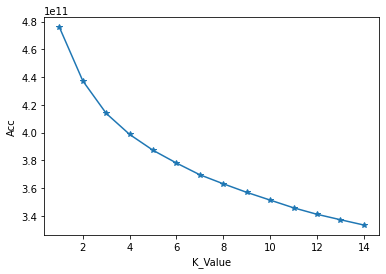

In [9]:
# Plot between Acc and K value.
# X_Axis = K value
# Y_Axis = SSE
plt.plot(range(1,15),SSE,'*-')
plt.xlabel("K_Value")
plt.ylabel("Acc")
# As the steepness between the k value of 7 and 9 changes significantly k value or number of cluster is chosen to be 8.

In [10]:
kmeans = KMeans(n_clusters=8)             # Intialize Kmeans for k = 8
kmeans.fit(data)                          # Fit and Train data 

KMeans()

In [11]:
# Dump model 
pickle_in = open('model/KMeans1.sav', 'wb')        
pickle.dump( kmeans ,pickle_in )
pickle_in.close()

In [12]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9])          # histogram is computed 

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([337263, 384324, 371791, 307766, 352562, 550584, 378351, 597956,
            0], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])) 



In [14]:
#performing kmeans prediction of the entire Staircase dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]

for filename in os.listdir(Chair_folder):
    #path
    path=os.path.join(Chair_folder,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(400,400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.medianBlur(img, 5)
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)                             # predict a feature(one row) in one of the 8 cluster                                      
    i=i+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])              # histogram computation
    print("feature vector of  ",i," : ", hist[0])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize the histogram 
Output = pd.DataFrame(normalized)
Output["Class"] = 0                                     # label the data
csv_data=Output.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\kmeans1.csv', mode='a',header=False,index=False)

feature vector of   1  :  [19  4  3  1 13  5  2  6]
feature vector of   2  :  [ 6 16 51 40  4 23 35 13]
feature vector of   3  :  [16  9  1  1 20 10 18 11]
feature vector of   4  :  [22 73 49 54 26 85 98 99]
feature vector of   5  :  [ 8  8  2  4 22 10 16  6]
feature vector of   6  :  [ 45  96  55  55  60 168  40 159]
feature vector of   7  :  [43 27  5  4 93 19 30 18]
feature vector of   8  :  [ 3 22  2  0  7  6 17  6]
feature vector of   9  :  [26 21 64 59 23 30 56 34]
feature vector of   10  :  [14 11 12  3 13 20 26 30]
feature vector of   11  :  [11 18 27  6 16 14 17 28]
feature vector of   12  :  [11 11 23  9  6  7 24 22]
feature vector of   13  :  [ 93  24   8   6 109  18   8  18]
feature vector of   14  :  [ 99  34  15  10 138  48  28  35]
feature vector of   15  :  [ 7 25 22 24  6 10 26 36]
feature vector of   16  :  [ 8 35  5  1 11 36 32 43]
feature vector of   17  :  [136 222 260 189  84 419 183 454]
feature vector of   18  :  [13 31 10  5 23 26 39 29]
feature vector of   19 

feature vector of   150  :  [ 18  31 105  79  29 166  42 232]
feature vector of   151  :  [50 38 34 11 45 77 55 71]
feature vector of   152  :  [ 72  61 125  99  73  58  63  52]
feature vector of   153  :  [43 18 43 18 89 95 28 76]
feature vector of   154  :  [21 32  7  2 38  5 25 15]
feature vector of   155  :  [11 36  7 10 13 35 53 41]
feature vector of   156  :  [ 73  59  24  17 108 124  30  72]
feature vector of   157  :  [35 53 11 14 96 28 66 26]
feature vector of   158  :  [ 2 13  4  2 10  6 19  7]
feature vector of   159  :  [11 22 42 95 15 11 25 25]
feature vector of   160  :  [ 58  23  66  21 101  76  49  64]
feature vector of   161  :  [14  7  2  0 12 11  5  6]
feature vector of   162  :  [ 70 103  60 108  65 207 104 154]
feature vector of   163  :  [12  9 22  4 30 16 18 17]
feature vector of   164  :  [30 59 26 30 38 29 98 30]
feature vector of   165  :  [12 54 15  1 18 36 41 38]
feature vector of   166  :  [21 17 28 12 20 28 24 32]
feature vector of   167  :  [19 22  9  7 2

feature vector of   297  :  [200  72 202 122  77 182 102 226]
feature vector of   298  :  [35 32 15  2 95 40 20 35]
feature vector of   299  :  [35 54  8  7 74 57 59 39]
feature vector of   300  :  [22 11  8  3 12 32 20 26]
feature vector of   301  :  [17 50 13 12 29 34 56 29]
feature vector of   302  :  [46 64 33 37 50 56 54 76]
feature vector of   303  :  [ 65  17  14  18  78 109  15  95]
feature vector of   304  :  [109  48 110  63 122 138 101 195]
feature vector of   305  :  [ 9 18  5  2 17 20 21 19]
feature vector of   306  :  [20 27 17 21 37 19 24 17]
feature vector of   307  :  [64 69 49 26 55 55 46 71]
feature vector of   308  :  [ 61  59  58  48 102 192  80 234]
feature vector of   309  :  [18 42 30 24 14 30 38 37]
feature vector of   310  :  [306 122 113  49 152 107  61 117]
feature vector of   311  :  [19 54 63 31 30 64 70 78]
feature vector of   312  :  [44 38 45 36 45 36 14 43]
feature vector of   313  :  [15 28 34  8 35 36 46 49]
feature vector of   314  :  [15 14  2  4 3

feature vector of   445  :  [ 35  61 124  67  43  43  59  57]
feature vector of   446  :  [14 28  3  1 23 37 17 34]
feature vector of   447  :  [10 29 62 64 19 25 35 44]
feature vector of   448  :  [14 11  8  4 30 26 35  9]
feature vector of   449  :  [ 8 14 17  5 14 44 27 42]
feature vector of   450  :  [21 55 36 25 36 33 63 55]
feature vector of   451  :  [ 29  52  89  36  48  95  67 120]
feature vector of   452  :  [15 28  9  6 17 21 38 17]
feature vector of   453  :  [ 81  46 108  52  99  83  46 118]
feature vector of   454  :  [10 44  2  2 11 20 27 29]
feature vector of   455  :  [ 8 36 13  6 32 27 48 26]
feature vector of   456  :  [12 35 15 15 37 38 51 30]
feature vector of   457  :  [ 17   9  22  16  22  97   9 193]
feature vector of   458  :  [42 51 45 44 47 56 45 63]
feature vector of   459  :  [ 63  20  11   9 136  75  25  54]
feature vector of   460  :  [15 34 16 10 28 32 24 30]
feature vector of   461  :  [33 53 42 25 12 49 40 65]
feature vector of   462  :  [10 41 16 12 2

feature vector of   595  :  [23 46 19 10 37 30 49 42]
feature vector of   596  :  [43 42 50 39 27 71 51 56]
feature vector of   597  :  [ 48  84  37  23  41  95  72 110]
feature vector of   598  :  [ 45  60  29  18  68  67  44 103]
feature vector of   599  :  [23 22 26 17 21 25 26 28]
feature vector of   600  :  [16 39 11  5 39 49 67 59]
feature vector of   601  :  [25 38 50 64 51 32 55 42]
feature vector of   602  :  [143 109 618 404  37  73  97 122]
feature vector of   603  :  [176  33  32  31 245 144  20  86]
feature vector of   604  :  [27 44  8 21 12 45 57 37]
feature vector of   605  :  [47 50 63 52 68 69 86 73]
feature vector of   606  :  [ 7 34 18 59 10 20 25 23]
feature vector of   607  :  [40  9  1  2 39 36 14 18]
feature vector of   608  :  [ 22  18  58  70  52  88  33 106]
feature vector of   609  :  [27 72 69 66 45 74 80 66]
feature vector of   610  :  [ 7 25  2  2  5 10 44 12]
feature vector of   611  :  [18 24 15 23 12 40 32 33]
feature vector of   612  :  [63 37 24 26 7

feature vector of   742  :  [19 36  5  1 22 35 26 43]
feature vector of   743  :  [31 69 55 58 36 73 63 99]
feature vector of   744  :  [10 35 46 29 20 35 24 50]
feature vector of   745  :  [ 38  25 106  40  40 159  19 148]
feature vector of   746  :  [10 22 24 12 18 52 38 40]
feature vector of   747  :  [39 67 71 33 43 47 56 82]
feature vector of   748  :  [49  9  2  4 85 30  5 29]
feature vector of   749  :  [ 95  97  83  63 130 188  59 195]
feature vector of   750  :  [11 26  4  5 12 20 28 19]
feature vector of   751  :  [15 22  9  1 12 14 20  7]
feature vector of   752  :  [ 8  4 17  6 12 16  7 20]
feature vector of   753  :  [196 123 223 156 216 203 125 212]
feature vector of   754  :  [ 24 132  44  40  43  72 110  64]
feature vector of   755  :  [17 18  4  3 22 13 29  5]
feature vector of   756  :  [ 86  98 540 249  34  77  33 115]
feature vector of   757  :  [99 60 43 38 74 62 57 67]
feature vector of   758  :  [ 8 19 18  5 11 19 18 38]
feature vector of   759  :  [17 45 58 58 2

feature vector of   888  :  [108  29  59  74  90  46  41  46]
feature vector of   889  :  [22 24 41 17 27 67 43 78]
feature vector of   890  :  [30 16 20  6 95 33 39 20]
feature vector of   891  :  [14 45 40 39 20 26 47 25]
feature vector of   892  :  [ 9 14 12  0  7  4 23  9]
feature vector of   893  :  [ 9 15  2  2 16 20  6 23]
feature vector of   894  :  [ 44 103  42  28  67  89  77  68]
feature vector of   895  :  [ 19   5  68 100  14  53  13  62]
feature vector of   896  :  [ 54  28 109  59  51  84  74 103]
feature vector of   897  :  [ 27  18 137  55  22  83  41 132]
feature vector of   898  :  [112  71 208 156 102 312 128 345]
feature vector of   899  :  [36 43 10  3 71 21 22  8]
feature vector of   900  :  [19  4  3  1 13  5  2  6]
feature vector of   901  :  [51 44 18  6 45 38 44 36]
feature vector of   902  :  [35 11 15 17 24 19 38 24]
feature vector of   903  :  [27 21 24 14 33 15 22 10]
feature vector of   904  :  [33 66  6  2 42 30 45 33]
feature vector of   905  :  [30 39

feature vector of   1034  :  [150 118 388 292  75 530 146 674]
feature vector of   1035  :  [110  38  24  26 156  45  23  43]
feature vector of   1036  :  [19 12  0  2 40 19 18  8]
feature vector of   1037  :  [39 56  9 10 44 24 28 27]
feature vector of   1038  :  [11 17  3  0 14 22 19 23]
feature vector of   1039  :  [21 27  6  0 19 28 38 19]
feature vector of   1040  :  [ 65  17  14  18  78 109  15  95]
feature vector of   1041  :  [15 14  2  4 36 31 21 30]
feature vector of   1042  :  [126 125 116  62 165 132  98 129]
feature vector of   1043  :  [54 17  9  4 90 45 23 32]
feature vector of   1044  :  [104  34  19  37 161  74   2 106]
feature vector of   1045  :  [16  6  4  1 29  8  3  6]
feature vector of   1046  :  [38 43 66 97 63 45 68 64]
feature vector of   1047  :  [16 47 50 24 30 45 57 49]
feature vector of   1048  :  [143  98 202 160 109 410  77 476]
feature vector of   1049  :  [12 41 12  9 42 48 48 33]
feature vector of   1050  :  [12 45 28 35 22 55 52 73]
feature vector of

feature vector of   1178  :  [165  36 341 258  40 347 103 363]
feature vector of   1179  :  [12 32 50 58  9 14 28 31]
feature vector of   1180  :  [16 46  4  1 17 23 29 14]
feature vector of   1181  :  [137  26  63  33 155 116  11 115]
feature vector of   1182  :  [33 18  6  0 56 23 10 15]
feature vector of   1183  :  [ 44  29  74  60  50  88  14 133]
feature vector of   1184  :  [ 5 39  9 27  8 27 39 33]
feature vector of   1185  :  [ 50  24  86  65  60  58  38 109]
feature vector of   1186  :  [ 63  22  24   7  38 182  43 122]
feature vector of   1187  :  [65 10 38 14 34 48  9 41]
feature vector of   1188  :  [31 25 18 16 44 22 13 16]
feature vector of   1189  :  [ 7 15  7  9  7 14 23 16]
feature vector of   1190  :  [13  6  0  1 21 19 24  6]
feature vector of   1191  :  [69 24 14 13 71 19 30 17]
feature vector of   1192  :  [13 32 14  5 34 35 30 37]
feature vector of   1193  :  [ 57   5 107  47  18 137  39 278]
feature vector of   1194  :  [11 27 32 30  4 17 23 12]
feature vector of

feature vector of   1326  :  [44 36 26 13 45 29 47 18]
feature vector of   1327  :  [14 10  7 22 18 12 13 22]
feature vector of   1328  :  [29 23  6  9 27 68 57 55]
feature vector of   1329  :  [38 29 13 14 44 21 29 18]
feature vector of   1330  :  [22 73 49 54 26 85 98 99]
feature vector of   1331  :  [ 8  8  2  4 22 10 16  6]
feature vector of   1332  :  [ 45  96  55  55  60 168  40 159]
feature vector of   1333  :  [43 27  5  4 93 19 30 18]
feature vector of   1334  :  [ 3 22  2  0  7  6 17  6]
feature vector of   1335  :  [26 21 64 59 23 30 56 34]
feature vector of   1336  :  [ 89  13  14   6 137  52  10  47]
feature vector of   1337  :  [11 11 32  6 11 65 33 21]
feature vector of   1338  :  [14 11 12  3 13 20 26 30]
feature vector of   1339  :  [11 18 27  6 16 14 17 28]
feature vector of   1340  :  [11 11 23  9  6  7 24 22]
feature vector of   1341  :  [ 93  24   8   6 109  18   8  18]
feature vector of   1342  :  [ 7 25 22 24  6 10 26 36]
feature vector of   1343  :  [ 8 35  5  1

feature vector of   1473  :  [ 9 22  0  1 15 22 25 35]
feature vector of   1474  :  [28 39 19 14 97 81 40 60]
feature vector of   1475  :  [11 29  6  3 18 20 18 25]
feature vector of   1476  :  [27 44 37 46 46 51 39 57]
feature vector of   1477  :  [ 18  31 105  79  29 166  42 232]
feature vector of   1478  :  [50 38 34 11 45 77 55 71]
feature vector of   1479  :  [ 72  61 125  99  73  58  63  52]
feature vector of   1480  :  [43 18 43 18 89 95 28 76]
feature vector of   1481  :  [30 48  4  2 63 19 49 11]
feature vector of   1482  :  [21 32  7  2 38  5 25 15]
feature vector of   1483  :  [11 36  7 10 13 35 53 41]
feature vector of   1484  :  [ 73  59  24  17 108 124  30  72]
feature vector of   1485  :  [35 53 11 14 96 28 66 26]
feature vector of   1486  :  [11 22 42 95 15 11 25 25]
feature vector of   1487  :  [ 58  23  66  21 101  76  49  64]
feature vector of   1488  :  [14  7  2  0 12 11  5  6]
feature vector of   1489  :  [ 70 103  60 108  65 207 104 154]
feature vector of   1490 

feature vector of   1620  :  [17 49 41 22 46 55 63 60]
feature vector of   1621  :  [ 8 23  3  3 14 24 13 24]
feature vector of   1622  :  [ 86   4  47  13  32 320  12 583]
feature vector of   1623  :  [200  72 202 122  77 182 102 226]
feature vector of   1624  :  [35 32 15  2 95 40 20 35]
feature vector of   1625  :  [30 23  3  5 24 13 20  8]
feature vector of   1626  :  [35 54  8  7 74 57 59 39]
feature vector of   1627  :  [22 11  8  3 12 32 20 26]
feature vector of   1628  :  [17 50 13 12 29 34 56 29]
feature vector of   1629  :  [46 64 33 37 50 56 54 76]
feature vector of   1630  :  [109  48 110  63 122 138 101 195]
feature vector of   1631  :  [ 9 18  5  2 17 20 21 19]
feature vector of   1632  :  [20 27 17 21 37 19 24 17]
feature vector of   1633  :  [64 69 49 26 55 55 46 71]
feature vector of   1634  :  [ 61  59  58  48 102 192  80 234]
feature vector of   1635  :  [18 42 30 24 14 30 38 37]
feature vector of   1636  :  [24 11 39 33 24 33 24 43]
feature vector of   1637  :  [306

feature vector of   1767  :  [29 25 11 24 31 27 26 31]
feature vector of   1768  :  [117  77  64  58 191 240  92 211]
feature vector of   1769  :  [17 12  0  0 12  8 10 10]
feature vector of   1770  :  [ 27  68 114  83  11  53  43  74]
feature vector of   1771  :  [ 1 20  3  0  5 15 15 12]
feature vector of   1772  :  [ 35  61 124  67  43  43  59  57]
feature vector of   1773  :  [14 28  3  1 23 37 17 34]
feature vector of   1774  :  [ 8 14 17  5 14 44 27 42]
feature vector of   1775  :  [21 55 36 25 36 33 63 55]
feature vector of   1776  :  [ 29  52  89  36  48  95  67 120]
feature vector of   1777  :  [15 28  9  6 17 21 38 17]
feature vector of   1778  :  [ 81  46 108  52  99  83  46 118]
feature vector of   1779  :  [10 44  2  2 11 20 27 29]
feature vector of   1780  :  [31 13 21  1 79 35 15 20]
feature vector of   1781  :  [18  8  3  0  7 12  4  7]
feature vector of   1782  :  [ 8 36 13  6 32 27 48 26]
feature vector of   1783  :  [12 35 15 15 37 38 51 30]
feature vector of   1784 

feature vector of   1914  :  [12  0  1  1  6  1  0  2]
feature vector of   1915  :  [ 93  17  84  67  50  51  28 129]
feature vector of   1916  :  [13 48 46 33 27 51 91 57]
feature vector of   1917  :  [ 47  66 125 150  55  76  72  80]
feature vector of   1918  :  [120 124  40  35 127  84  71  92]
feature vector of   1919  :  [38 62 34 19 38 54 57 57]
feature vector of   1920  :  [21 27 18 19 19 67 20 44]
feature vector of   1921  :  [23 46 19 10 37 30 49 42]
feature vector of   1922  :  [43 42 50 39 27 71 51 56]
feature vector of   1923  :  [ 48  84  37  23  41  95  72 110]
feature vector of   1924  :  [ 45  60  29  18  68  67  44 103]
feature vector of   1925  :  [ 12  27  29   4  38  85  36 174]
feature vector of   1926  :  [23 22 26 17 21 25 26 28]
feature vector of   1927  :  [16 39 11  5 39 49 67 59]
feature vector of   1928  :  [25 38 50 64 51 32 55 42]
feature vector of   1929  :  [143 109 618 404  37  73  97 122]
feature vector of   1930  :  [27 44  8 21 12 45 57 37]
feature v

feature vector of   2058  :  [19 53 31 23 27 50 28 41]
feature vector of   2059  :  [ 87  75 123  90  65 157  78 170]
feature vector of   2060  :  [11 25 91 50 22 78 42 83]
feature vector of   2061  :  [14 43  1  3 38 23 51 20]
feature vector of   2062  :  [ 68  54 102  61  81 133  13 108]
feature vector of   2063  :  [ 60  76  92  35  92 136  90 185]
feature vector of   2064  :  [29 71 22 27 24 54 60 69]
feature vector of   2065  :  [29 63 30 28 26 28 42 34]
feature vector of   2066  :  [10 16 15  8 19 13 13 17]
feature vector of   2067  :  [13  9 25  7 11 10 15 21]
feature vector of   2068  :  [19 36  5  1 22 35 26 43]
feature vector of   2069  :  [16 13 21  5 24 24 29 25]
feature vector of   2070  :  [31 69 55 58 36 73 63 99]
feature vector of   2071  :  [10 35 46 29 20 35 24 50]
feature vector of   2072  :  [ 38  25 106  40  40 159  19 148]
feature vector of   2073  :  [10 22 24 12 18 52 38 40]
feature vector of   2074  :  [49  9  2  4 85 30  5 29]
feature vector of   2075  :  [ 95

feature vector of   2203  :  [59 27 68 32 31 35 48 29]
feature vector of   2204  :  [122  19  10   6 102  42  28  31]
feature vector of   2205  :  [ 8 22  7  1 14 18 18 28]
feature vector of   2206  :  [ 43  10 338 313  14  94  20 123]
feature vector of   2207  :  [ 41  20 194 385  31 197  84 157]
feature vector of   2208  :  [  9  33  38  75   5  38 135  57]
feature vector of   2209  :  [23 22  9  5 39 28 25 22]
feature vector of   2210  :  [145 122 175 133 104 396 154 441]
feature vector of   2211  :  [17  5  9  8 64 26 20 22]
feature vector of   2212  :  [104  29  39  24 170  76  25  57]
feature vector of   2213  :  [12  3  5  0 21 23  5 13]
feature vector of   2214  :  [10  9  2  0 21 15 20 10]
feature vector of   2215  :  [108  29  59  74  90  46  41  46]
feature vector of   2216  :  [22 24 41 17 27 67 43 78]
feature vector of   2217  :  [30 16 20  6 95 33 39 20]
feature vector of   2218  :  [ 9 15  2  2 16 20  6 23]
feature vector of   2219  :  [ 44 103  42  28  67  89  77  68]
f

feature vector of   2351  :  [47 76 14 17 39 29 41 36]
feature vector of   2352  :  [55 59  0  3 23 13 58 15]
feature vector of   2353  :  [24 13  5  0 71 28  1 11]
feature vector of   2354  :  [29 50 24 20 47 73 72 78]
feature vector of   2355  :  [102  19 381 135  66 258  23 293]
feature vector of   2356  :  [59 31 32 13 47 39 52 39]
feature vector of   2357  :  [12 13 14  8 11 11 19 11]
feature vector of   2358  :  [ 4  7  7  2  8 13 13  5]
feature vector of   2359  :  [40 55 10 12 70 52 46 60]
feature vector of   2360  :  [ 66  41  71  51 192 124   9 116]
feature vector of   2361  :  [ 82  55  14  28 145  47  59  27]
feature vector of   2362  :  [ 47  25  89 172  23  96  40  86]
feature vector of   2363  :  [29 56 24 15 39 41 74 49]
feature vector of   2364  :  [ 22  11 110  93  32  49  45  71]
feature vector of   2365  :  [12 41  1  2 20 25 28 25]
feature vector of   2366  :  [ 53  14   9   8 122  37   9  34]
feature vector of   2367  :  [ 97  28  16  11 111  49  28  45]
feature v

feature vector of   2499  :  [165  36 341 258  40 347 103 363]
feature vector of   2500  :  [ 7 13 15  4 45 15  6 15]
feature vector of   2501  :  [31 64 28 22 56 56 67 64]
feature vector of   2502  :  [ 9 30 12 11 33 37 37 27]
feature vector of   2503  :  [45 28 71 53 47 77 52 69]
feature vector of   2504  :  [ 7 36  9  1 32 39 34 18]
feature vector of   2505  :  [10 44 17  5 26 36 28 17]
feature vector of   2506  :  [14 27 30 13 19 28 18 30]
feature vector of   2507  :  [34 34 59 61 41 52 32 66]
feature vector of   2508  :  [13 10  3  2  8  1 17  6]
feature vector of   2509  :  [14 41  6  7 17 19 22 21]
feature vector of   2510  :  [ 7  9  0  0  8  2 15  3]
feature vector of   2511  :  [12 32 50 58  9 14 28 31]
feature vector of   2512  :  [16 46  4  1 17 23 29 14]
feature vector of   2513  :  [ 65 160  93  94  55 222 129 208]
feature vector of   2514  :  [46 21  7 23 48  9 46 13]
feature vector of   2515  :  [ 75 113  96  90 100 134 113 127]
feature vector of   2516  :  [38 75 91 59

feature vector of   2643  :  [ 66  24  37  16 104  40  15  42]
feature vector of   2644  :  [10 35 11 13 29 38 32 31]
feature vector of   2645  :  [23 18 95 60 13 67 40 89]
feature vector of   2646  :  [28 31 13 15 52 45 43 47]
feature vector of   2647  :  [48 70 18 13 57 44 72 47]
feature vector of   2648  :  [11 27 32 30  4 17 23 12]
feature vector of   2649  :  [ 73  70 144 122  64 158 142 175]
feature vector of   2650  :  [ 49  69 185 171  34 259 103 301]
feature vector of   2651  :  [100 104 296 234  98 411 130 490]
feature vector of   2652  :  [23 41  1  0 39 20 48 17]
feature vector of   2653  :  [  7  23  48 103   8  26  40  25]
feature vector of   2654  :  [24 41 25  8 24 26 20 26]
feature vector of   2655  :  [10 46  4  3 22 31 20 30]
feature vector of   2656  :  [ 38  49 111 124  41  38  29  39]
feature vector of   2657  :  [ 19  25  70 133  41  28  23  27]
feature vector of   2658  :  [65 15 42 29 97 23 12 23]
feature vector of   2659  :  [106 106  97  65 159  92  73 110]
f

feature vector of   2789  :  [ 3 23  1  0 11 21 15 29]
feature vector of   2790  :  [12 10 10  3 22 18 12 21]
feature vector of   2791  :  [19 47 39 13 32 39 55 33]
feature vector of   2792  :  [14 35 27 24 29 40 60 61]
feature vector of   2793  :  [27 21 17 15 68 38 36 41]
feature vector of   2794  :  [ 9  5  9 11 26 29 11 12]
feature vector of   2795  :  [ 68 105  28  18 131  71  81  33]
feature vector of   2796  :  [20 16 84 30 16 42 18 43]
feature vector of   2797  :  [ 75  47  20  17 108  68  36  54]
feature vector of   2798  :  [110  21 364 168  39 290  37 317]
feature vector of   2799  :  [18 45 60 71 21 92 58 91]
feature vector of   2800  :  [23 31  8  7 35 33 33 21]
feature vector of   2801  :  [25 56 17 12 19 54 49 40]
feature vector of   2802  :  [ 47  21   5   8 102  20  25  20]
feature vector of   2803  :  [ 55  31  37  47  54  66  57 107]
feature vector of   2804  :  [ 5 10 15  1 14 17 25 12]
feature vector of   2805  :  [ 27  25 195 143  18 259  21 271]
feature vector of

feature vector of   2935  :  [214  39 333 191  55  88  88 138]
feature vector of   2936  :  [ 6 32 29 42 15 36 12 34]
feature vector of   2937  :  [ 34  78  55  54  50  72 120  76]
feature vector of   2938  :  [81 42 71 51 33 52 54 44]
feature vector of   2939  :  [10 23  5  3 11 26 16 19]
feature vector of   2940  :  [45 95 46 41 64 87 66 67]
feature vector of   2941  :  [149  85 208 170 132 183  77 197]
feature vector of   2942  :  [37 69 32 42 34 59 80 76]
feature vector of   2943  :  [12  3  1  1  8 11  1 11]
feature vector of   2944  :  [ 2 29 15 21  5 14 37 13]
feature vector of   2945  :  [15 24  7  4 17 31 36 17]
feature vector of   2946  :  [ 5 21 42 39  1 11 28 16]
feature vector of   2947  :  [34 75 68 45 45 77 69 89]
feature vector of   2948  :  [22  2 19 14 11 19 14 18]
feature vector of   2949  :  [110 134 223 133  96 319 175 364]
feature vector of   2950  :  [ 6 19  1  1  8  7 14  5]
feature vector of   2951  :  [ 8 26 11  5 19 24 16 27]
feature vector of   2952  :  [ 57

In [15]:
#performing kmeans prediction of the entire Staircase dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]

for filename in os.listdir(Sofa_folder):
    #path
    path=os.path.join(Sofa_folder,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(400,400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.medianBlur(img, 5)
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    i=i+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])
    print("feature vector of  ",i," : ", hist[0])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize 
Output = pd.DataFrame(normalized)
Output["Class"] = 1
csv_data=Output.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\kmeans1.csv', mode='a',header=False,index=False)

feature vector of   1  :  [ 0 24  2  0  1  6 15 15]
feature vector of   2  :  [ 6 29  9  5  7 12 17 17]
feature vector of   3  :  [16 18  0  0  6 23 23 66]
feature vector of   4  :  [40 54 29 22 53 40 54 58]
feature vector of   5  :  [51 85 49 23 36 98 53 91]
feature vector of   6  :  [27 35 11 14 22 33 25 26]
feature vector of   7  :  [37 26  2  3 31 23  8 16]
feature vector of   8  :  [ 32  81  88  57  54 132  58 130]
feature vector of   9  :  [ 18 118  31  45  36  82 102  87]
feature vector of   10  :  [ 64  74  87  99 106 165  65 149]
feature vector of   11  :  [ 60  37  62  43  40  93  60 102]
feature vector of   12  :  [17 39 30 33 33 37 77 19]
feature vector of   13  :  [126 109 116 100 105 348  65 368]
feature vector of   14  :  [27 38 10 15 32 24 54 13]
feature vector of   15  :  [20 17  7  7 25 22  9 20]
feature vector of   16  :  [ 47 103 185 137  66 228 105 239]
feature vector of   17  :  [57 44 40 26 66 78 32 75]
feature vector of   18  :  [52 48  6  1 43 40 46 29]
feature

feature vector of   147  :  [23 65 16 15 19 69 54 72]
feature vector of   148  :  [48 28 10  3 43 23 26 29]
feature vector of   149  :  [ 75  99 222 194  55 218  69 245]
feature vector of   150  :  [58 79 40 38 71 79 55 67]
feature vector of   151  :  [78 85 48 29 80 71 71 92]
feature vector of   152  :  [ 51  76  77  74  65 140  73 166]
feature vector of   153  :  [ 78  91  30  16 109 176  47 182]
feature vector of   154  :  [67 43 14 24 62 43 45 48]
feature vector of   155  :  [105  80  98  92  71 161  71 142]
feature vector of   156  :  [27 49  9 22 21 57 38 88]
feature vector of   157  :  [13 52 15 21 19 22 67 30]
feature vector of   158  :  [26 33 36 32 27 39 40 23]
feature vector of   159  :  [17  1  0  0  8 17  1 14]
feature vector of   160  :  [34 32 23 16 33 26 25 29]
feature vector of   161  :  [ 90  87  35  37  93  95  70 124]
feature vector of   162  :  [ 52  43 107  86  50 107  53 121]
feature vector of   163  :  [20 26 21 17 16 19 24 17]
feature vector of   164  :  [19 30

feature vector of   294  :  [19 45  5  9 15 17 39 34]
feature vector of   295  :  [78 40 89 56 57 68 71 61]
feature vector of   296  :  [35 74 47 45 57 57 65 75]
feature vector of   297  :  [21  7  0  0  6 16 10 20]
feature vector of   298  :  [30 43  5  4 23 43 38 49]
feature vector of   299  :  [ 64  57 121  66  51 136  43 177]
feature vector of   300  :  [30 30  2  0 36 23 17 21]
feature vector of   301  :  [12 13  1  0  5 11  1 10]
feature vector of   302  :  [ 48  67  88  52  54  98  81 105]
feature vector of   303  :  [23 24 46 59 19 24 20 32]
feature vector of   304  :  [22 25  5  7 20 13 16 19]
feature vector of   305  :  [ 31  50  27  35  35  84  30 104]
feature vector of   306  :  [56 36 41 27 43 26 28 44]
feature vector of   307  :  [25 15 18 35 17 31 44 25]
feature vector of   308  :  [26 45 19 18 48 31 25 28]
feature vector of   309  :  [18 19  2  1 21 13 17 14]
feature vector of   310  :  [45 60 20 17 27 57 61 49]
feature vector of   311  :  [11 20  0  0  8  2 14 10]
feat

feature vector of   445  :  [52 96 24 22 33 54 84 64]
feature vector of   446  :  [41 31 15 12 63 43 41 30]
feature vector of   447  :  [25 21  7  1 27 25  6 22]
feature vector of   448  :  [24 17  0  0 14  6 24 18]
feature vector of   449  :  [18 17  0  0 20 11 11 24]
feature vector of   450  :  [21 11  3  0 17  6 14 16]
feature vector of   451  :  [20 21  7  1 11 17 34 15]
feature vector of   452  :  [32 48 83 78 41 73 43 67]
feature vector of   453  :  [11 16  3  1 10 16 14 19]
feature vector of   454  :  [13 28  6  7 10 23 15 22]
feature vector of   455  :  [129  67  96  75 116 191  65 197]
feature vector of   456  :  [38 61 32 35 20 21 20 41]
feature vector of   457  :  [15 48 36 26 17 37 50 49]
feature vector of   458  :  [57 44 21 35 62 66 42 77]
feature vector of   459  :  [49 51 41 36 31 26 36 48]
feature vector of   460  :  [ 19  83  28  28  31 103  68 146]
feature vector of   461  :  [ 8 22 13  5 11  8 32  7]
feature vector of   462  :  [15 68 14 14 55 69 33 83]
feature vect

feature vector of   591  :  [ 6 17  4  4  3  1 16 12]
feature vector of   592  :  [82 74 58 68 71 88 46 90]
feature vector of   593  :  [ 61  61  58  36  50 121  52 134]
feature vector of   594  :  [52 14 84 72 53 97 65 63]
feature vector of   595  :  [10 27 22 15 18 28 27 27]
feature vector of   596  :  [13 33 55 31  8 39 40 47]
feature vector of   597  :  [ 31  68 104  89  58 150 118 202]
feature vector of   598  :  [35 58 34 31 23 46 25 49]
feature vector of   599  :  [56 57 68 34 46 37 69 52]
feature vector of   600  :  [124  80 181 147 120 241  83 262]
feature vector of   601  :  [ 9  8  1  4  6  9 16 10]
feature vector of   602  :  [107  69  46  50 105 104  46  91]
feature vector of   603  :  [28 31 17 13 37 18 15 24]
feature vector of   604  :  [ 7 23 10 10  6 13 15  9]
feature vector of   605  :  [ 33  72  54  66  35 130  50  83]
feature vector of   606  :  [57 73 73 57 38 91 59 85]
feature vector of   607  :  [45 59 55 55 30 45 33 65]
feature vector of   608  :  [ 83 111  99  

feature vector of   737  :  [ 57 100  91 126  75 180 101 198]
feature vector of   738  :  [23 54 45 22 14 52 49 52]
feature vector of   739  :  [113  71  61  61  88  79  47  65]
feature vector of   740  :  [ 79  49 153  85 115 198 122 226]
feature vector of   741  :  [ 8 36 45 31 11 68 56 90]
feature vector of   742  :  [39 42 86 68 26 53 77 79]
feature vector of   743  :  [44 34 69 64 38 82 30 87]
feature vector of   744  :  [ 46  52  82  50  39 110  67  92]
feature vector of   745  :  [418 152 217 124 304 570  94 488]
feature vector of   746  :  [116  85  85 110 137  78  98  83]
feature vector of   747  :  [ 75 135 150 120  69 179 101 213]
feature vector of   748  :  [105 148 141  99 104 219  98 248]
feature vector of   749  :  [20 38  8  5 17 28 24 21]
feature vector of   750  :  [12 26  1  0 19 18 30 17]
feature vector of   751  :  [33 72 40 25 33 89 99 74]
feature vector of   752  :  [ 44  47  97 101  96  96  69 130]
feature vector of   753  :  [ 8 25  2  3  0  4 29 10]
feature ve

feature vector of   883  :  [21 61 13 26 23 63 68 50]
feature vector of   884  :  [ 75 122  51  48 101  96 115 100]
feature vector of   885  :  [ 5 21  1  3 11  5 22 13]
feature vector of   886  :  [63 78 83 81 52 74 65 64]
feature vector of   887  :  [ 55  98  62  58  31 114  55 142]
feature vector of   888  :  [43 55 77 62 45 46 63 47]
feature vector of   889  :  [45 86 25 21 19 35 50 37]
feature vector of   890  :  [19 32 16  3 15 22 29 22]
feature vector of   891  :  [ 81  89  96  68  55 157  78 156]
feature vector of   892  :  [134  86 242 108  49 412  87 467]
feature vector of   893  :  [27 38 10 15 32 24 54 13]
feature vector of   894  :  [25 24 11 19 45 48 20 49]
feature vector of   895  :  [17 34 48 51 30 32 78 46]
feature vector of   896  :  [ 31  39 112  56  27  56  74  63]
feature vector of   897  :  [24 37  4  2 42 40 37 23]
feature vector of   898  :  [23 59 74 62 36 91 95 88]
feature vector of   899  :  [18 32 14  0  6  8 22 13]
feature vector of   900  :  [23 56 23 12 2

feature vector of   1028  :  [127  74  72  48 102  79  70  63]
feature vector of   1029  :  [ 42  61  34  16  37  79  64 119]
feature vector of   1030  :  [38 34  9  9 63 42 37 39]
feature vector of   1031  :  [ 3 36 12  1  6 20 49 26]
feature vector of   1032  :  [ 26  46  40  31  27  80  61 100]
feature vector of   1033  :  [ 8 34 17 19 18 22 36 24]
feature vector of   1034  :  [34 66 47 74 57 78 91 70]
feature vector of   1035  :  [28 38 21 20 20 27 30 24]
feature vector of   1036  :  [ 39 104  89  82  36 127  79 143]
feature vector of   1037  :  [ 1 40 13  8  5  7 42 10]
feature vector of   1038  :  [ 42  36  72  52  30 107  47  83]
feature vector of   1039  :  [ 38  42  93  89  36 130  54 121]
feature vector of   1040  :  [24 51 70 41 22 75 46 70]
feature vector of   1041  :  [11 29 29 10  7 14 24 22]
feature vector of   1042  :  [80 18 45 31 31 84 37 90]
feature vector of   1043  :  [ 9 55 27 18  5 15 42 22]
feature vector of   1044  :  [10 40 53 27  8 47 38 54]
feature vector of

feature vector of   1172  :  [ 1 24  4  9  3  4 18 30]
feature vector of   1173  :  [14 36  4  1 25 22 25 21]
feature vector of   1174  :  [ 4 26  4  5  3  1 17 17]
feature vector of   1175  :  [ 58  56 152 107  48  68  76  70]
feature vector of   1176  :  [28 31 24 27 22 23 34 27]
feature vector of   1177  :  [ 39  89  62  56  22 123  30 143]
feature vector of   1178  :  [ 8  5  6  3  4 10 11  8]
feature vector of   1179  :  [35 18  1  1 13 23 15 30]
feature vector of   1180  :  [25 55 24 22 41 67 29 61]
feature vector of   1181  :  [ 57  69 174  85  61 250  75 302]
feature vector of   1182  :  [ 6 21  9  4  5  5 16 14]
feature vector of   1183  :  [40 45 27 20 51 25 53 35]
feature vector of   1184  :  [ 42  81 112  56  27 153 104 162]
feature vector of   1185  :  [33 48  2  1 23 24 59 27]
feature vector of   1186  :  [ 9 34 40 37  7 63 31 76]
feature vector of   1187  :  [30 43 40 25 21 21 37 30]
feature vector of   1188  :  [ 6 27  3  1  4 12 12  8]
feature vector of   1189  :  [28 

feature vector of   1317  :  [68 41  5  0 52 24 51 26]
feature vector of   1318  :  [21 18  2  2 14 31 28 10]
feature vector of   1319  :  [27 16  0  0 27 20 17 27]
feature vector of   1320  :  [42 14  2  2 44 10 64 13]
feature vector of   1321  :  [ 3 22  5  6  1  2 11  6]
feature vector of   1322  :  [42 49  8  9 62 28 42 35]
feature vector of   1323  :  [38 34  9  9 63 42 37 39]
feature vector of   1324  :  [48 46 17 11 40 27 23 24]
feature vector of   1325  :  [51 85 49 23 36 98 53 91]
feature vector of   1326  :  [27 35 11 14 22 33 25 26]
feature vector of   1327  :  [52 48  6  1 43 40 46 29]
feature vector of   1328  :  [13 64 67 47  9 34 67 44]
feature vector of   1329  :  [ 46  60  96  79  46 146  66 193]
feature vector of   1330  :  [52 31 16  8 49 38 37 37]
feature vector of   1331  :  [ 81 133  53  44  96 187  92 185]
feature vector of   1332  :  [42 57 11  6 19 42 47 42]
feature vector of   1333  :  [14 61 59 28 17 52 42 49]
feature vector of   1334  :  [127  65  56  51  79

feature vector of   1464  :  [24 51 70 41 22 75 46 70]
feature vector of   1465  :  [13 26  0  0 15  2 30  7]
feature vector of   1466  :  [49 72 32 44 31 71 51 49]
feature vector of   1467  :  [ 4 19  9  2  2  5 22  9]
feature vector of   1468  :  [ 8 26  2  1  2  5 23  2]
feature vector of   1469  :  [17 18 14  2 28 21 16 23]
feature vector of   1470  :  [ 81 112  49  62  78  61  84  67]
feature vector of   1471  :  [15 33 12 10 19 28 33 27]
feature vector of   1472  :  [ 74  73  34  30 122 182  15 230]
feature vector of   1473  :  [27 19 57 44 40 56 63 45]
feature vector of   1474  :  [22 36 52 35  8 15 43 29]
feature vector of   1475  :  [80 18 45 31 31 84 37 90]
feature vector of   1476  :  [26  7  2  0 39  4 22  4]
feature vector of   1477  :  [24 27 35 68 27 35 49 20]
feature vector of   1478  :  [ 3 35 14  6  0 19 31 20]
feature vector of   1479  :  [ 7 11  3  2 13  8 23 11]
feature vector of   1480  :  [ 36  95 189 243  43 202 107 244]
feature vector of   1481  :  [25 43  4  7

feature vector of   1611  :  [52 50 18 11 70 32 52 36]
feature vector of   1612  :  [42 46 23 26 15 37 44 44]
feature vector of   1613  :  [125 102  64  73 101 167  75 182]
feature vector of   1614  :  [ 7  8  3  2  9 14 14 20]
feature vector of   1615  :  [ 57 100  95 103  74 174  96 152]
feature vector of   1616  :  [43 32 11  4 44 34 42 21]
feature vector of   1617  :  [ 53  61  78  47  33 123  41 148]
feature vector of   1618  :  [119  81  51  39 127 149  40 177]
feature vector of   1619  :  [21 23  4  1 25 12 20  9]
feature vector of   1620  :  [26 65 32 23 34 69 31 80]
feature vector of   1621  :  [40  9  0  1 18  4  3  6]
feature vector of   1622  :  [35 28  1  0 19 12 41 18]
feature vector of   1623  :  [ 7 19  2  3  5 14 12 15]
feature vector of   1624  :  [ 90 117  74  75  98 141 106 139]
feature vector of   1625  :  [27 52 33 20 33 29 34 33]
feature vector of   1626  :  [ 50  83  45  56  35 134 112 141]
feature vector of   1627  :  [288 159 248 168 288  70 148  61]
feature v

feature vector of   1755  :  [80 46 18 11 96 62 46 49]
feature vector of   1756  :  [ 59 110 149 135  78 186 147 201]
feature vector of   1757  :  [24 54 48 48 10 58 46 89]
feature vector of   1758  :  [22 43 46 23  7 40 30 46]
feature vector of   1759  :  [24 24  1  1 16 13 13 25]
feature vector of   1760  :  [106 101 159 114  62 173 111 189]
feature vector of   1761  :  [35 40 41 48 23 52 30 49]
feature vector of   1762  :  [ 58  78  83  71  29 163  85 152]
feature vector of   1763  :  [34 19 11  0 32 20 24 30]
feature vector of   1764  :  [96 20 10  3 87 37  7 34]
feature vector of   1765  :  [16 67 42 36 29 50 53 38]
feature vector of   1766  :  [ 6 24  3  5 15 16 14 16]
feature vector of   1767  :  [31 68 48 60 30 80 60 88]
feature vector of   1768  :  [120  95  29  52 103  99  59 115]
feature vector of   1769  :  [29 30 59 51 32 49 18 50]
feature vector of   1770  :  [ 53 100 177 153  58 271 160 273]
feature vector of   1771  :  [79 70 60 51 66 61 51 75]
feature vector of   1772 

feature vector of   1896  :  [15 29  8  2 11 25 41 17]
feature vector of   1897  :  [ 75  85 110 103  69 226  98 221]
feature vector of   1898  :  [ 2 34  2  4  1 26 35 29]
feature vector of   1899  :  [ 9 24  1  6  4 22 30 17]
feature vector of   1900  :  [ 47 104  59  51  49 144  64 158]
feature vector of   1901  :  [ 8 26 14 18 11 32 24 33]
feature vector of   1902  :  [12 58 44 26  5 40 44 66]
feature vector of   1903  :  [19 21 20 25 42 26 20 36]
feature vector of   1904  :  [18 34 26 14 10 26 43 24]
feature vector of   1905  :  [23 21  0  1 15 16 10 12]
feature vector of   1906  :  [10 17  8  5  9 30 28 29]
feature vector of   1907  :  [17 24 15 20 17 16 22 31]
feature vector of   1908  :  [ 3  5  3  1  0  3 10  4]
feature vector of   1909  :  [ 6 27  3  1  4 12 12  8]
feature vector of   1910  :  [ 81 198  83 104  94 345 144 346]
feature vector of   1911  :  [10 35 19 15 13 59 18 62]
feature vector of   1912  :  [ 4  6  9  3  1 10 15 11]
feature vector of   1913  :  [ 3 21 21 13

feature vector of   2039  :  [115  68  60  51 109 108  56 102]
feature vector of   2040  :  [ 6 17  5  8 18 24 17 12]
feature vector of   2041  :  [ 19  84  84  49  33 134  78 130]
feature vector of   2042  :  [39 42 32 27 59 49 31 39]
feature vector of   2043  :  [89 48 20 14 73 59 56 43]
feature vector of   2044  :  [15 37 36 35 21 39 51 70]
feature vector of   2045  :  [ 4 19  3  7  9  4 22 10]
feature vector of   2046  :  [ 65  67  99  71  59 260  78 324]
feature vector of   2047  :  [ 51  89 114 111  45  76  74  92]
feature vector of   2048  :  [ 75 133 100  75 101 246  90 268]
feature vector of   2049  :  [169 114 282 160  79 267  88 326]
feature vector of   2050  :  [30 38  1  0 55 30 42 11]
feature vector of   2051  :  [123  70 141 130 115 266  47 287]
feature vector of   2052  :  [103  70 210 144  65 135  60 140]
feature vector of   2053  :  [62 26 28 37 59 31 30 48]
feature vector of   2054  :  [ 51  46  86  60  50 110  97 115]
feature vector of   2055  :  [ 63  90 142  84  4

feature vector of   2181  :  [22 14  0  0 22  8 16  9]
feature vector of   2182  :  [23 78 21 10 39 59 69 59]
feature vector of   2183  :  [ 24  70  86  70  20 117  78 145]
feature vector of   2184  :  [42 43 54 29 30 99 41 87]
feature vector of   2185  :  [54 67 24 13 58 42 65 47]
feature vector of   2186  :  [38 50 31 23 31 55 45 53]
feature vector of   2187  :  [ 70  79  37  43  68 105  68 106]
feature vector of   2188  :  [ 7  2 26 44  2  6 19 15]
feature vector of   2189  :  [15 19 21  5 18 41 32 28]
feature vector of   2190  :  [ 21  49  33  14  17  94  53 121]
feature vector of   2191  :  [ 88  50  44  29  63 105  20 124]
feature vector of   2192  :  [10 28  3  0  8 12 35 15]
feature vector of   2193  :  [12 26 12  4  8 18 43 21]
feature vector of   2194  :  [24 59 53 51 45 59 33 46]
feature vector of   2195  :  [ 9 24  2  0  4  8 20  9]
feature vector of   2196  :  [26 63 34 66 32 45 44 47]
feature vector of   2197  :  [ 66  90  61  51  71 117  87 116]
feature vector of   2198 

feature vector of   2323  :  [23 10 62 38 12 30  7 37]
feature vector of   2324  :  [94 50 53 35 81 94 58 66]
feature vector of   2325  :  [64 53 43 55 54 99 60 96]
feature vector of   2326  :  [ 8 22 22  3 12 12 36 21]
feature vector of   2327  :  [50 30 25 14 76 40 18 38]
feature vector of   2328  :  [21 26 28 28 17 30 30 32]
feature vector of   2329  :  [ 32  74  24  26  30 118  56 124]
feature vector of   2330  :  [ 52 141  97  82  76 140 108 155]
feature vector of   2331  :  [117  46  44  32  69  52  19  56]
feature vector of   2332  :  [ 52  55 146  75  45 341  85 312]
feature vector of   2333  :  [ 54  58  39  46  41 102  70  88]
feature vector of   2334  :  [101 115 112  70  81 361 100 328]
feature vector of   2335  :  [33 31 20 28 26 89 16 96]
feature vector of   2336  :  [61 68 16 14 55 90 51 60]
feature vector of   2337  :  [ 49  93 127 178 110 117  96  97]
feature vector of   2338  :  [140  86 187 116 111 272  86 322]
feature vector of   2339  :  [ 67  49  82  59  64 236  3

feature vector of   2464  :  [39 61 36 34 54 87 60 65]
feature vector of   2465  :  [ 35 118  66  90  60 125 103 127]
feature vector of   2466  :  [ 35  58  69  61  26  96  57 146]
feature vector of   2467  :  [52 58 46 40 71 64 30 73]
feature vector of   2468  :  [18 62  7  5 42 22 19 44]
feature vector of   2469  :  [ 78 141  97  60  81 166  56 197]
feature vector of   2470  :  [36 32 51 41 27 78 50 92]
feature vector of   2471  :  [88 71 19 26 86 66 36 70]
feature vector of   2472  :  [128 107 124  69 112 178  85 188]
feature vector of   2473  :  [ 82  79 117 105  66 180  70 190]
feature vector of   2474  :  [36 31 23 23 19 31 39 25]
feature vector of   2475  :  [101  56  67  31  66 158  62 174]
feature vector of   2476  :  [ 84  50  36  22  52 106  52 116]
feature vector of   2477  :  [ 85  62  77  47  88 113  39  99]
feature vector of   2478  :  [12 57  0  0  8 17 59 16]
feature vector of   2479  :  [ 80  87  33  42  59 136  64 158]
feature vector of   2480  :  [157  94 149 124 12

feature vector of   2608  :  [169  92 143 124 124 257  70 264]
feature vector of   2609  :  [ 2 26  0  0  0  2 16  7]
feature vector of   2610  :  [17 26  4  0 29 12 29 22]
feature vector of   2611  :  [20 23 22 22 17 18 44 20]
feature vector of   2612  :  [ 78 105  45  44 122 111  89 132]
feature vector of   2613  :  [ 65 112  58  35  61 236  77 221]
feature vector of   2614  :  [15 25  6  2 13  2 21  5]
feature vector of   2615  :  [ 43  80  50  37  58 156 122 187]
feature vector of   2616  :  [ 38  67  76 113  48 108  62 123]
feature vector of   2617  :  [59 88 61 46 51 83 99 76]
feature vector of   2618  :  [ 7 23 14  4  6 18 13 16]
feature vector of   2619  :  [55 61 40 19 41 76 21 79]
feature vector of   2620  :  [ 70  90 108 103  74 166  76 190]
feature vector of   2621  :  [15 25  3  7  4  3 17 11]
feature vector of   2622  :  [ 2 22  8  2  3 12  9 18]
feature vector of   2623  :  [17 34 48 51 30 32 78 46]
feature vector of   2624  :  [ 60  67 109  83  54  62  61  67]
feature v

feature vector of   2749  :  [55 61 34 20 35 47 40 95]
feature vector of   2750  :  [13 30  7 11 12  4 17 15]
feature vector of   2751  :  [27 62 43 33 31 58 64 84]
feature vector of   2752  :  [ 23  55  57  60  22 108  89 139]
feature vector of   2753  :  [15 23 15 23 11 19 32 22]
feature vector of   2754  :  [ 74  81  79  83  89 110  79 120]
feature vector of   2755  :  [ 40  87  48  76  72 149  71 145]
feature vector of   2756  :  [ 23  55  74  39  27  89  45 101]
feature vector of   2757  :  [ 70  90 183 129  42 306  71 371]
feature vector of   2758  :  [10 37 17  8  8 67 38 56]
feature vector of   2759  :  [ 46  86  88  86  66 158  80 159]
feature vector of   2760  :  [ 41  98  32  37  45 107  82 131]
feature vector of   2761  :  [53 65 62 35 96 82 37 75]
feature vector of   2762  :  [ 46  82  94  84  47 109 105 131]
feature vector of   2763  :  [9 3 0 0 5 7 6 5]
feature vector of   2764  :  [18 18  2  0  8  8 13 19]
feature vector of   2765  :  [158 133 224 200 101 192 133 202]
f

feature vector of   2891  :  [ 62 114  80 109  50 109 110 141]
feature vector of   2892  :  [21 25 13 22 42 32 29 28]
feature vector of   2893  :  [ 8 16  5  2  0 10 14  8]
feature vector of   2894  :  [60 49 22 20 27 21 39 29]
feature vector of   2895  :  [16 14  3  3 17 13 25 12]
feature vector of   2896  :  [19 32  4  3 27 32 28 23]
feature vector of   2897  :  [102  82 135  75  78 254  95 266]
feature vector of   2898  :  [25 38 11 14 17 13 20 34]
feature vector of   2899  :  [ 45  62  43  64  72 119  64 118]
feature vector of   2900  :  [ 48  67  67  75  75 178  60 195]
feature vector of   2901  :  [129 120 140 156 111 163  90 177]
feature vector of   2902  :  [18 41 40 54 35 35 64 46]
feature vector of   2903  :  [ 72  84 107 109  95 182  71 201]
feature vector of   2904  :  [12 27 35 16 19 43 32 35]
feature vector of   2905  :  [17 34 12  8 24 18 38 14]
feature vector of   2906  :  [127  74  72  48 102  79  70  63]
feature vector of   2907  :  [27 24 20  8 46 19 38 27]
feature v

In [16]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]

for filename in os.listdir(Wadrobe_folder):
    #path
    path=os.path.join(Wadrobe_folder,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(400,400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.medianBlur(img, 5)
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    i=i+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])
    print("feature vector of  ",i," : ", hist[0])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
norm = Normalizer()# normalize the histogram
normalized = norm.fit_transform(data)                   # normalize 
Output = pd.DataFrame(normalized)
Output["Class"] = 2
csv_data=Output.to_csv(r'D:\sem5\cv\course_project\notebooks\CSV\kmeans1.csv', mode='a',header=False,index=False)

feature vector of   1  :  [ 7 14  4  0  7  4 11  7]
feature vector of   2  :  [48 27 72 52 26 44 53 57]
feature vector of   3  :  [41 43 61 67 60 86 58 93]
feature vector of   4  :  [ 4 20 24 35 13  9 21 21]
feature vector of   5  :  [19 27 18 26  7 28 15 46]
feature vector of   6  :  [ 72  49  70  64  44  93  70 100]
feature vector of   7  :  [57 18 41 35 18 59 14 68]
feature vector of   8  :  [101  26  56  61 131  87  62  85]
feature vector of   9  :  [ 8  6  0  0  4  4 10  9]
feature vector of   10  :  [29 21 14 10 22 23 31 36]
feature vector of   11  :  [33 49 58 65 42 87 48 84]
feature vector of   12  :  [ 91  61 101 108  71 136  69 165]
feature vector of   13  :  [35 31 19 26 31 49 38 41]
feature vector of   14  :  [25 58 39 17 24 42 71 25]
feature vector of   15  :  [15 13 44 24  8 37 44 49]
feature vector of   16  :  [35 19 17 14 20 12 24 20]
feature vector of   17  :  [110  32 220 133  50 160  27 146]
feature vector of   18  :  [ 46  97  50  39  64 154  84 182]
feature vector 

feature vector of   152  :  [23 44 15  8 46 41 42 54]
feature vector of   153  :  [ 74  42  75  78  59 112  28 163]
feature vector of   154  :  [68 40 12 19 57 59 33 65]
feature vector of   155  :  [29 39  7  9 26 28 39 31]
feature vector of   156  :  [7 4 0 0 8 9 0 1]
feature vector of   157  :  [17 40 45 72 15 47 76 54]
feature vector of   158  :  [ 5  4  9  5  6  8  8 13]
feature vector of   159  :  [29 55 39 62 30 94 74 95]
feature vector of   160  :  [19 22 22 29 22 14 23 23]
feature vector of   161  :  [29 10 32 16 27 34  6 25]
feature vector of   162  :  [41 28 23 13 28 54 22 50]
feature vector of   163  :  [16 15 31 41  7 30 21 37]
feature vector of   164  :  [41 28 76 86 45 73 68 80]
feature vector of   165  :  [32 62 30 16 27 42 30 64]
feature vector of   166  :  [26 24 28 66 34 31 31 48]
feature vector of   167  :  [ 25  57 121  91  78 135 103 169]
feature vector of   168  :  [ 8 20  0  0  5  0  3  2]
feature vector of   169  :  [34 37 30 38 31 49 33 47]
feature vector of   

feature vector of   302  :  [17 25 11  4  3 27 31 24]
feature vector of   303  :  [ 48  93  61  65  22 123 107 160]
feature vector of   304  :  [6 2 0 0 6 6 2 6]
feature vector of   305  :  [41 23 33 24 53 39 28 37]
feature vector of   306  :  [ 46  73  79 118  38 131  66 158]
feature vector of   307  :  [ 27  48  34 109  38  53  50  63]
feature vector of   308  :  [ 43 106  37  51  53  84  69  78]
feature vector of   309  :  [30 33 37 25 33 39 39 37]
feature vector of   310  :  [50 55 41 38 72 80 41 84]
feature vector of   311  :  [22 26  5  4 32 12 15  7]
feature vector of   312  :  [51 49 18 22 68 59 59 61]
feature vector of   313  :  [15 30 24 23 31 48 24 36]
feature vector of   314  :  [42 63 16 37 40 58 78 64]
feature vector of   315  :  [25 41  5 10 28 55 31 56]
feature vector of   316  :  [ 1 17  0  0  1  1 17  6]
feature vector of   317  :  [44 36 63 59 39 48 60 76]
feature vector of   318  :  [22 31 22 21 26 27 42 66]
feature vector of   319  :  [39 54 65 56 52 56 71 53]
feat

feature vector of   452  :  [1 6 5 3 0 1 8 0]
feature vector of   453  :  [ 3  4  7  1  3  3 10 11]
feature vector of   454  :  [42 36 45 34 26 70 59 66]
feature vector of   455  :  [69 47 23 20 52 43 44 42]
feature vector of   456  :  [18 46 71 74 50 78 68 93]
feature vector of   457  :  [55 72 74 74 47 79 86 68]
feature vector of   458  :  [ 90  93  48  56 128 139  89 183]
feature vector of   459  :  [ 4 19 37 41  7 20 25 22]
feature vector of   460  :  [ 38  58  50  65  54 115  43 138]
feature vector of   461  :  [13 12 10 13 14  8  8  9]
feature vector of   462  :  [22 24 10 16 29 33 18 44]
feature vector of   463  :  [ 48  50  58  37  47 116  55 108]
feature vector of   464  :  [27 15 12 17 14 34 21 27]
feature vector of   465  :  [ 6  0  0  3 10  1  1  7]
feature vector of   466  :  [15 26 18 21 15 44 22 35]
feature vector of   467  :  [38 22 15 23 24 59 71 63]
feature vector of   468  :  [55 46 35 51 58 36 35 75]
feature vector of   469  :  [36 19 12  8 24  6 39 20]
feature vect

feature vector of   602  :  [44 45 42 37 25 72 34 79]
feature vector of   603  :  [13 18  4  2 30 16 19 17]
feature vector of   604  :  [57 63 44 40 60 71 67 92]
feature vector of   605  :  [39 27 40 25 33 16 39 20]
feature vector of   606  :  [36 32 31 39 60 48 55 51]
feature vector of   607  :  [63 69 35 46 82 68 48 83]
feature vector of   608  :  [55 57 31 36 61 70 81 71]
feature vector of   609  :  [35 18 18 68 14 23 44 29]
feature vector of   610  :  [10 23 21 19 32 35 37 48]
feature vector of   611  :  [54 26 27 18 43 39 32 30]
feature vector of   612  :  [4 8 7 8 0 1 3 1]
feature vector of   613  :  [28 22 27 23 32 61 19 77]
feature vector of   614  :  [57 56 42 34 19 16 47 24]
feature vector of   615  :  [33 43 23 27 66 45 44 48]
feature vector of   616  :  [26 41 12 24 58 33 26 33]
feature vector of   617  :  [ 9 16  9  4  9 19 11 30]
feature vector of   618  :  [  7 157  47  44  52 113  43 202]
feature vector of   619  :  [10 28 14 31 18 20 27 22]
feature vector of   620  :  

feature vector of   750  :  [ 52  62  75 104  57 171  86 134]
feature vector of   751  :  [14 21 14 22 14 18 37 20]
feature vector of   752  :  [109  82 149  76  92 371  61 391]
feature vector of   753  :  [29 37 56 42 24 88 36 91]
feature vector of   754  :  [ 41  69  24  32  53  98  53 100]
feature vector of   755  :  [34 47 24 32 49 40 34 50]
feature vector of   756  :  [54 27 42 87 42 74 45 69]
feature vector of   757  :  [ 27  58  70  88  52 170  71 163]
feature vector of   758  :  [12 35 33 21 19 23 39 63]
feature vector of   759  :  [16 51 55 69 23 28 49 31]
feature vector of   760  :  [18 58 46 51  7 55 72 50]
feature vector of   761  :  [ 8  8  0  1  1  3 10  5]
feature vector of   762  :  [33 22 65 47 28 20 45 38]
feature vector of   763  :  [12 43 12 10 20 30 34 32]
feature vector of   764  :  [41 52 36 41 40 63 41 53]
feature vector of   765  :  [36 29 19 37 35 28 32 26]
feature vector of   766  :  [37 43 10 17 36 42 44 42]
feature vector of   767  :  [58 48 36 17 45 56 32 

feature vector of   897  :  [11 15  0  0 11  4 12  7]
feature vector of   898  :  [69 46 33 29 63 78 46 93]
feature vector of   899  :  [49 45 74 95 43 74 44 88]
feature vector of   900  :  [68 22 41 45 83 95 19 70]
feature vector of   901  :  [56 47 28 49 40 70 61 68]
feature vector of   902  :  [69 46 33 29 63 78 46 93]
feature vector of   903  :  [17 54 10 14 41 22 32 17]
feature vector of   904  :  [44 49 57 64 28 60 40 56]
feature vector of   905  :  [17 34 26 11 31 22 24 34]
feature vector of   906  :  [15 12 16 11 10 14 14 18]
feature vector of   907  :  [48 28 29 73 48 46 45 55]
feature vector of   908  :  [ 6 15 15  5  5  7 20 18]
feature vector of   909  :  [29 19 26 20 35 43 22 27]
feature vector of   910  :  [25  4 35 18  5 36 17 40]
feature vector of   911  :  [13 29 70 49  6 65 41 76]
feature vector of   912  :  [135  77  30  25 122 140  75 104]
feature vector of   913  :  [49 45 74 95 43 74 44 88]
feature vector of   914  :  [70 54 70 42 96 48 48 34]
feature vector of   

feature vector of   1047  :  [15 30 27 16 13 21 11 24]
feature vector of   1048  :  [ 78  54 122  96  32 115  58 136]
feature vector of   1049  :  [35 11 22 14 35 28 28 34]
feature vector of   1050  :  [40 32 29 22 40 36 29 44]
feature vector of   1051  :  [ 9  9 10 19  6  9 20  9]
feature vector of   1052  :  [22 31 20 22 54 49 42 50]
feature vector of   1053  :  [11 15 31 19 18 54 33 66]
feature vector of   1054  :  [ 83  82  48  56 113 128 100 169]
feature vector of   1055  :  [114  75  53  31 138  87  73 110]
feature vector of   1056  :  [11 10  0  2  8  4 12  7]
feature vector of   1057  :  [70 54 70 42 96 48 48 34]
feature vector of   1058  :  [ 64  30  49  22  67 119  64  97]
feature vector of   1059  :  [24 46 32 23 30 11 31 12]
feature vector of   1060  :  [36 45 22 15 32 24 34 42]
feature vector of   1061  :  [10  8 35 67  1 16  4 39]
feature vector of   1062  :  [43 60 34 32 55 92 62 77]
feature vector of   1063  :  [12 22 14  8  9 13 18 15]
feature vector of   1064  :  [ 1 

feature vector of   1194  :  [ 8  8  6  8 10 22 16 43]
feature vector of   1195  :  [25 35 20 15 16 32 29 39]
feature vector of   1196  :  [ 5 30  4  2  7 15 20 11]
feature vector of   1197  :  [15 24 22 19  8  9 22 13]
feature vector of   1198  :  [ 2 22  9  3  3  9 37  5]
feature vector of   1199  :  [ 7  9  4  0  6  5 13 14]
feature vector of   1200  :  [32 16  3  1 41 15  5 10]
feature vector of   1201  :  [ 5 10  1  1 10  4 16  0]
feature vector of   1202  :  [34 24 11  7 33 51 27 61]
feature vector of   1203  :  [ 9  3  3  0  9 19  3  6]
feature vector of   1204  :  [18 45  8 14 41 26 78 33]
feature vector of   1205  :  [ 3 10 13  5  7 16 30 21]
feature vector of   1206  :  [ 9 18  2  6 17 15 13  2]
feature vector of   1207  :  [20 10  1  0 20 14  2  7]
feature vector of   1208  :  [12  5  9  4  6  3  5 15]
feature vector of   1209  :  [ 8  7  7  7  8  8 18 16]
feature vector of   1210  :  [ 6 13 23 15  4  8 23 17]
feature vector of   1211  :  [ 1  5 25 22  1  6  6 10]
feature ve

feature vector of   1345  :  [ 2 14  2  2  8 10 20 20]
feature vector of   1346  :  [14 12  9  6 14 23 36 17]
feature vector of   1347  :  [ 58  54  73  47  59 106  37 108]
feature vector of   1348  :  [ 2 11 16  4  0 13 32 11]
feature vector of   1349  :  [ 3 17  2  2 16 10 12  9]
feature vector of   1350  :  [ 0 11  2  0  5  6 17  4]
feature vector of   1351  :  [ 1 15  5  3  4  5  9  8]
feature vector of   1352  :  [29 27 18 47 22 27 19 24]
feature vector of   1353  :  [ 2  5 16 11  3 11  9 17]
feature vector of   1354  :  [21  9 13 11 21 31 36 19]
feature vector of   1355  :  [12  8  1  2 28  8  9  8]
feature vector of   1356  :  [24 27 23 39 22 25 29 33]
feature vector of   1357  :  [33 37 32 15 24 34 24 44]
feature vector of   1358  :  [24 42 31 47 24 47 30 53]
feature vector of   1359  :  [ 1 18  6  6  2  2  9  8]
feature vector of   1360  :  [ 0 14  0  0  0  0  9  6]
feature vector of   1361  :  [13 20 12 19 12 20 11 11]
feature vector of   1362  :  [25 20  3  2 29 55 17 31]
fe

feature vector of   1494  :  [40 39 68 40 28 82 37 95]
feature vector of   1495  :  [31 16  3  1 76 30 42 37]
feature vector of   1496  :  [37 39 27 41 26 64 33 66]
feature vector of   1497  :  [22 38 33 41 28 41 38 55]
feature vector of   1498  :  [73 79 53 44 51 69 60 69]
feature vector of   1499  :  [0 5 1 0 1 0 8 2]
feature vector of   1500  :  [ 41  29 118 121  29  31  34  43]
feature vector of   1501  :  [66 51 92 42 69 83 46 76]
feature vector of   1502  :  [13 37 33 36 16 57 36 72]
feature vector of   1503  :  [268  56 167  96 319 238  35 238]
feature vector of   1504  :  [44 49 45 45 42 55 56 68]
feature vector of   1505  :  [ 23  44  74 102  15  47  48  57]
feature vector of   1506  :  [24 34 25 12 55 49 53 45]
feature vector of   1507  :  [ 7 52 58 75 22 83 38 84]
feature vector of   1508  :  [13 38 37 46  8 25 35 28]
feature vector of   1509  :  [22 36  9 24 27 32 33 37]
feature vector of   1510  :  [44 40 50 66 45 70 54 77]
feature vector of   1511  :  [ 4  8 16 11  1 19 1

feature vector of   1641  :  [ 35  41  55  81  43  81  68 103]
feature vector of   1642  :  [ 28  58  86  96  50 111  64 104]
feature vector of   1643  :  [24 51 17 16 31 35 34 29]
feature vector of   1644  :  [42 47 25 39 20 69 46 64]
feature vector of   1645  :  [53 75 50 56 69 80 73 98]
feature vector of   1646  :  [18 45 18 34 36 46 31 50]
feature vector of   1647  :  [4 3 7 1 7 4 7 5]
feature vector of   1648  :  [ 63 105 107  80  62 160  71 168]
feature vector of   1649  :  [11 42 10 28 13 38 47 42]
feature vector of   1650  :  [44 57 23 23 39 56 33 49]
feature vector of   1651  :  [10 33 13 17 20 30 39 26]
feature vector of   1652  :  [ 56  67  38  46  48 126  70 116]
feature vector of   1653  :  [35 44 33 48 38 52 57 61]
feature vector of   1654  :  [26 37 33 51 39 45 80 42]
feature vector of   1655  :  [69 60 34 22 55 63 52 60]
feature vector of   1656  :  [45 99 43 51 61 84 60 84]
feature vector of   1657  :  [10 65  8 15 18 23 23 14]
feature vector of   1658  :  [ 6 28  3  2

feature vector of   1787  :  [23 40 69 78 17 47 55 76]
feature vector of   1788  :  [32 73 30 28 30 85 49 82]
feature vector of   1789  :  [ 13  14  56 119  18  17  25  21]
feature vector of   1790  :  [ 38  70  68  51  40 106  95 101]
feature vector of   1791  :  [ 92 117 107  80  70 182 133 168]
feature vector of   1792  :  [21 38 11 23 31 21 31 23]
feature vector of   1793  :  [ 9 33 44 62 12 28 39 38]
feature vector of   1794  :  [10 23 40 19 13 16 33 23]
feature vector of   1795  :  [ 2  6 12  3  4  1  6  6]
feature vector of   1796  :  [13 23  2  2 24 18 22 22]
feature vector of   1797  :  [27 37 10 25 76 33 16 37]
feature vector of   1798  :  [37 41 16 17 70 36 17 28]
feature vector of   1799  :  [ 4  6 26 19 22 10  6 15]
feature vector of   1800  :  [13 22  2  1 12 23 17 26]
feature vector of   1801  :  [12  9 23 16  9  6 25 12]
feature vector of   1802  :  [ 62  61  38  40  60 121  41 138]
feature vector of   1803  :  [22 32 21 21 56 67 33 60]
feature vector of   1804  :  [52 

feature vector of   1935  :  [ 4 16 11  3  8 24 18 20]
feature vector of   1936  :  [ 23  24  64 109   9  49  48  80]
feature vector of   1937  :  [27 35 24 15 28 20 42 20]
feature vector of   1938  :  [57 31  9  4 52 10 30 21]
feature vector of   1939  :  [37 58 30 39 33 54 59 57]
feature vector of   1940  :  [ 95  86  34  22  73 167  55 163]
feature vector of   1941  :  [ 46  64  45  50  49 111  45 102]
feature vector of   1942  :  [ 0  2  7 10  3  1 16  9]
feature vector of   1943  :  [ 4 16 11 24  4 11 38 13]
feature vector of   1944  :  [ 44  65  43  46  71  89  62 115]
feature vector of   1945  :  [ 53  58  47  67  36  93  58 114]
feature vector of   1946  :  [50 78 10 11 27 39 65 49]
feature vector of   1947  :  [17 13 67 45 12 34 23 47]
feature vector of   1948  :  [13 43 18  9 11 17 26 45]
feature vector of   1949  :  [34 56 37 23 30 72 51 74]
feature vector of   1950  :  [32 23  9 18 56 34 17 56]
feature vector of   1951  :  [46 54 66 40 44 74 46 75]
feature vector of   1952 

feature vector of   2081  :  [58 34 48 28 82 56 29 83]
feature vector of   2082  :  [28 33 31 25 20 29 38 40]
feature vector of   2083  :  [62 36 28 33 55 48 48 65]
feature vector of   2084  :  [55 48 32 43 56 63 37 53]
feature vector of   2085  :  [22 22 18 29 14 13 28 26]
feature vector of   2086  :  [37 25 30 46 42 41 42 48]
feature vector of   2087  :  [35 68 16 26 65 60 29 64]
feature vector of   2088  :  [34 34 23 24 23 40 23 46]
feature vector of   2089  :  [ 6 11  1  1  5  7 17 11]
feature vector of   2090  :  [24 25  8  4 28 31 26 29]
feature vector of   2091  :  [42 28 12 10 45 35 38 34]
feature vector of   2092  :  [48 30 33 30 29 28 31 32]
feature vector of   2093  :  [24 44 35 34 18 56 66 75]
feature vector of   2094  :  [ 5 15 42 32  5  4 19 14]
feature vector of   2095  :  [35 35 24 23 50 36 25 29]
feature vector of   2096  :  [15 30 14 18 26 57 17 51]
feature vector of   2097  :  [ 49  39  78  81  38 120  39 118]
feature vector of   2098  :  [ 31  52  21  36  22 141  74

feature vector of   2228  :  [ 4  6  0  0 21 12  1  3]
feature vector of   2229  :  [ 87  66 100 144  52 138  82  99]
feature vector of   2230  :  [ 87  77 116  80  37 110  94 125]
feature vector of   2231  :  [19 41 29 39 47 58 53 57]
feature vector of   2232  :  [41 21 28 13 15 41 22 39]
feature vector of   2233  :  [24 27 15  4 58  7 21 10]
feature vector of   2234  :  [13 53 19 38 19 39 28 46]
feature vector of   2235  :  [10  5 18 15 19 17 10 14]
feature vector of   2236  :  [55 42 10  4 41 48 48 42]
feature vector of   2237  :  [ 9 27 10 10  2  9 24 33]
feature vector of   2238  :  [ 6 15 37 37 10 35 33 41]
feature vector of   2239  :  [46 20 16 13 38 15 31 19]
feature vector of   2240  :  [ 6  5 13 14  3  5  7 11]
feature vector of   2241  :  [16 85 27 16  4 22 48 41]
feature vector of   2242  :  [15 30 27 16 13 21 11 24]
feature vector of   2243  :  [ 78  54 122  96  32 115  58 136]
feature vector of   2244  :  [35 11 22 14 35 28 28 34]
feature vector of   2245  :  [40 32 29 22

feature vector of   2374  :  [31 28  8 11 39 17 21 23]
feature vector of   2375  :  [ 1 26  3  1 22  7 14  9]
feature vector of   2376  :  [51 59 35 21 48 63 36 68]
feature vector of   2377  :  [20 19 20 29 26 25 37 31]
feature vector of   2378  :  [ 45  74  39  34  39 112  72 112]
feature vector of   2379  :  [45 30  3  8 45 20 31 24]
feature vector of   2380  :  [ 40  66 105  64  18 129  35 178]
feature vector of   2381  :  [17 59 21 30 20 53 57 61]
feature vector of   2382  :  [ 57  42  52  42  69  93  45 120]
feature vector of   2383  :  [26 13  3  1 13 30 26 20]
feature vector of   2384  :  [15 30 32 32 21 41 37 60]
feature vector of   2385  :  [ 88  88 171 133  79 160  93 179]
feature vector of   2386  :  [39 19 13  2 23 36 23 50]
feature vector of   2387  :  [ 7 15  9 11  0 11 14 18]
feature vector of   2388  :  [20  6  8  4  2  9 11  9]
feature vector of   2389  :  [10 33 36 32 15 21 42 21]
feature vector of   2390  :  [27 28  8  9 17 18 24 15]
feature vector of   2391  :  [ 5 

feature vector of   2519  :  [39 36 29 34 21 46 32 48]
feature vector of   2520  :  [18 25 17  9  7 23 23 28]
feature vector of   2521  :  [ 65  65  29  29  48 115  40 118]
feature vector of   2522  :  [14 49 43 56 20 88 54 85]
feature vector of   2523  :  [28 17 26 23 14 21 30 32]
feature vector of   2524  :  [18 58 46 51  7 55 72 50]
feature vector of   2525  :  [20 21 15  9 23 51 45 30]
feature vector of   2526  :  [ 61 115  68  95  44 143  99 140]
feature vector of   2527  :  [ 60  50  93  93  53 124  50 135]
feature vector of   2528  :  [43 33 50 38 42 48 86 44]
feature vector of   2529  :  [ 24  35 130  90  14  29  50  27]
feature vector of   2530  :  [32 45 31 42 37 35 59 43]
feature vector of   2531  :  [31 47 26 16 21 27 36 32]
feature vector of   2532  :  [18 50  7  4 19 20 16 21]
feature vector of   2533  :  [ 41  53  46  51  70 100  66  86]
feature vector of   2534  :  [27 68 24 14 21 17 60 77]
feature vector of   2535  :  [ 8  8  0  1  1  3 10  5]
feature vector of   2536 

feature vector of   2667  :  [ 5 30  4  2  7 15 20 11]
feature vector of   2668  :  [21 44 26 26 30 55 47 55]
feature vector of   2669  :  [ 67  54  98 103  75 135  54 161]
feature vector of   2670  :  [15 24 22 19  8  9 22 13]
feature vector of   2671  :  [ 2 22  9  3  3  9 37  5]
feature vector of   2672  :  [ 7  9  4  0  6  5 13 14]
feature vector of   2673  :  [32 16  3  1 41 15  5 10]
feature vector of   2674  :  [ 5 10  1  1 10  4 16  0]
feature vector of   2675  :  [ 9  3  3  0  9 19  3  6]
feature vector of   2676  :  [18 45  8 14 41 26 78 33]
feature vector of   2677  :  [ 3 10 13  5  7 16 30 21]
feature vector of   2678  :  [ 9 18  2  6 17 15 13  2]
feature vector of   2679  :  [20 10  1  0 20 14  2  7]
feature vector of   2680  :  [ 39  61  75  80  38 119  65 117]
feature vector of   2681  :  [12  5  9  4  6  3  5 15]
feature vector of   2682  :  [ 8  7  7  7  8  8 18 16]
feature vector of   2683  :  [ 6 13 23 15  4  8 23 17]
feature vector of   2684  :  [ 1  5 25 22  1  6  

feature vector of   2820  :  [ 3 17  2  2 16 10 12  9]
feature vector of   2821  :  [ 0 11  2  0  5  6 17  4]
feature vector of   2822  :  [ 1 15  5  3  4  5  9  8]
feature vector of   2823  :  [29 27 18 47 22 27 19 24]
feature vector of   2824  :  [12 21 13 24 18 10 23 17]
feature vector of   2825  :  [ 2  5 16 11  3 11  9 17]
feature vector of   2826  :  [21  9 13 11 21 31 36 19]
feature vector of   2827  :  [12  8  1  2 28  8  9  8]
feature vector of   2828  :  [24 27 23 39 22 25 29 33]
feature vector of   2829  :  [33 37 32 15 24 34 24 44]
feature vector of   2830  :  [ 1 18  6  6  2  2  9  8]
feature vector of   2831  :  [ 0 14  0  0  0  0  9  6]
feature vector of   2832  :  [13 20 12 19 12 20 11 11]
feature vector of   2833  :  [25 20  3  2 29 55 17 31]
feature vector of   2834  :  [1 1 4 1 0 2 5 3]
feature vector of   2835  :  [29 15 59 26 16 76 12 85]
feature vector of   2836  :  [ 4 14  2  1  1  4  7 12]
feature vector of   2837  :  [ 1 13  9  3  4 12 15  9]
feature vector of 

feature vector of   2971  :  [0 5 1 0 1 0 8 2]
feature vector of   2972  :  [ 41  29 118 121  29  31  34  43]
feature vector of   2973  :  [66 51 92 42 69 83 46 76]
feature vector of   2974  :  [268  56 167  96 319 238  35 238]
feature vector of   2975  :  [44 49 45 45 42 55 56 68]
feature vector of   2976  :  [ 23  44  74 102  15  47  48  57]
feature vector of   2977  :  [24 34 25 12 55 49 53 45]
feature vector of   2978  :  [ 7 52 58 75 22 83 38 84]
feature vector of   2979  :  [ 5 18 35 26  6  8 37 11]
feature vector of   2980  :  [13 38 37 46  8 25 35 28]
feature vector of   2981  :  [22 36  9 24 27 32 33 37]
feature vector of   2982  :  [44 40 50 66 45 70 54 77]
feature vector of   2983  :  [ 4  8 16 11  1 19 17 25]
feature vector of   2984  :  [ 73 115  61  78  71  94  96  99]
feature vector of   2985  :  [27  6 59 41 15 13 16 21]
feature vector of   2986  :  [143 109 105 116 110 166  76 223]
feature vector of   2987  :  [121  51 109  52  67  74  46  89]
feature vector of   2988 

In [17]:
# Load CSV file obtained from Kmeans Dimensionality reductiom
data1= pd.read_csv(r'D://sem5//cv//course_project//notebooks//CSV//kmeans1.csv',header=None)

data1

,0,1,2,3,4,5,6,7,8
0,0.762444,0.160514,0.120386,0.040129,0.521672,0.200643,0.080257,0.240772,0
1,0.074813,0.199502,0.635912,0.498755,0.049875,0.286784,0.436410,0.162095,0
2,0.446516,0.251166,0.027907,0.027907,0.558146,0.279073,0.502331,0.306980,0
3,0.112216,0.372352,0.249935,0.275439,0.132619,0.433561,0.499870,0.504971,0
4,0.250000,0.250000,0.062500,0.125000,0.687500,0.312500,0.500000,0.187500,0
...,...,...,...,...,...,...,...,...,...
8995,0.182218,0.611732,0.182218,0.169203,0.104125,0.338405,0.416499,0.481577,2
8996,0.179101,0.296443,0.352026,0.302619,0.314971,0.481720,0.265564,0.512600,2
8997,0.127578,0.280671,0.503931,0.338081,0.267913,0.401869,0.261534,0.484795,2
8998,0.112220,0.229541,0.193835,0.275449,0.209137,0.515192,0.362165,0.617210,2


In [18]:
#training variables
x = data1.iloc[:,0:8].values
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.762444,0.160514,0.120386,0.040129,0.521672,0.200643,0.080257,0.240772
1,0.074813,0.199502,0.635912,0.498755,0.049875,0.286784,0.436410,0.162095
2,0.446516,0.251166,0.027907,0.027907,0.558146,0.279073,0.502331,0.306980
3,0.112216,0.372352,0.249935,0.275439,0.132619,0.433561,0.499870,0.504971
4,0.250000,0.250000,0.062500,0.125000,0.687500,0.312500,0.500000,0.187500
...,...,...,...,...,...,...,...,...
8995,0.182218,0.611732,0.182218,0.169203,0.104125,0.338405,0.416499,0.481577
8996,0.179101,0.296443,0.352026,0.302619,0.314971,0.481720,0.265564,0.512600
8997,0.127578,0.280671,0.503931,0.338081,0.267913,0.401869,0.261534,0.484795
8998,0.112220,0.229541,0.193835,0.275449,0.209137,0.515192,0.362165,0.617210


In [19]:
# target variable
y = data1.iloc[:,8].values
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [20]:
from sklearn.preprocessing import StandardScaler
Standardize = StandardScaler()
x_scaled = Standardize.fit_transform(x)                    # standardize the data
pd.DataFrame(x_scaled)
x_scaled                                                   # print standardized data

array([[ 3.34388561, -1.21664101, -0.8003665 , ..., -1.34065192,
        -1.72316016, -1.16285711],
       [-1.35746049, -0.96084881,  2.54596757, ..., -0.69355529,
         0.54522913, -1.7037799 ],
       [ 1.1838834 , -0.62188912, -1.40065435, ..., -0.75148202,
         0.96508724, -0.70765589],
       ...,
       [-0.99670912, -0.42830867,  1.68926728, ...,  0.17097563,
        -0.56858251,  0.51487107],
       [-1.10170884, -0.76376488, -0.32360276, ...,  1.02226467,
         0.07234869,  1.42526544],
       [-0.24305666,  1.51938889, -0.77322985, ..., -0.29584542,
         1.15557188, -1.41680054]])

#  2. Principal Component Analysis ( PCA )

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)                          # initialize PCA
pca.fit(x_scaled)                                     # train PCA on data

PCA()

In [22]:
x_pca = pca.transform(x_scaled)                      # use trained PCA model to transform the data
x_pca = pd.DataFrame(x_pca)                          # convert array in datframe to save in csv
x_pca

,0,1,2,3,4,5,6,7
0,2.629746,-3.047496,1.829551,1.517204,0.449217,-0.185190,0.050967,0.583066
1,-2.311472,1.986598,2.751266,-0.856456,0.397226,-0.601382,0.645021,0.774958
2,2.652148,-0.764909,0.155902,-0.378176,1.212757,0.411058,-0.340434,-0.136096
3,-1.109594,1.273757,-0.825126,-0.306721,0.344521,-0.023587,-0.374323,-0.088835
4,2.379709,-0.329051,0.620637,-1.940293,0.505989,0.742822,-0.266053,0.141102
...,...,...,...,...,...,...,...,...
8995,0.078060,1.672214,-1.162438,0.889915,-0.680008,-0.028655,-0.056363,-0.013339
8996,-1.465855,-0.426796,-0.102026,-0.474206,-0.423907,0.191598,0.040163,-0.308067
8997,-2.035179,0.106468,0.711310,-0.330931,-0.397734,0.453885,0.567736,-0.276566
8998,-1.675092,-0.168977,-1.259500,-0.519529,0.382174,0.407915,-0.689198,0.081526


In [23]:
x_pca.shape                          

(9000, 8)

In [24]:
print(pca.explained_variance_ratio_)                              # variance ratio of principal components

[0.32015595 0.24451495 0.18479021 0.06908874 0.06633856 0.04976124
 0.04095466 0.0243957 ]


In [25]:
# Since first 6 Principal Components had 93.63% of the total percent about the data
# hence they were considered
pca = PCA(n_components= 6)               # intialize PCA for component count = 6
pca.fit(x_scaled)                        # train PCA on data

PCA(n_components=6)

In [26]:
x_pca = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca                                   # output from PCA

,0,1,2,3,4,5
0,2.629746,-3.047496,1.829551,1.517204,0.449217,-0.185190
1,-2.311472,1.986598,2.751266,-0.856456,0.397226,-0.601382
2,2.652148,-0.764909,0.155902,-0.378176,1.212757,0.411058
3,-1.109594,1.273757,-0.825126,-0.306721,0.344521,-0.023587
4,2.379709,-0.329051,0.620637,-1.940293,0.505989,0.742822
...,...,...,...,...,...,...
8995,0.078060,1.672214,-1.162438,0.889915,-0.680008,-0.028655
8996,-1.465855,-0.426796,-0.102026,-0.474206,-0.423907,0.191598
8997,-2.035179,0.106468,0.711310,-0.330931,-0.397734,0.453885
8998,-1.675092,-0.168977,-1.259500,-0.519529,0.382174,0.407915


In [27]:
B=pd.concat([x_pca, pd.DataFrame(y)],axis=1)                # append target variable to final dataframe
B

,0,1,2,3,4,5,0
0,2.629746,-3.047496,1.829551,1.517204,0.449217,-0.185190,0
1,-2.311472,1.986598,2.751266,-0.856456,0.397226,-0.601382,0
2,2.652148,-0.764909,0.155902,-0.378176,1.212757,0.411058,0
3,-1.109594,1.273757,-0.825126,-0.306721,0.344521,-0.023587,0
4,2.379709,-0.329051,0.620637,-1.940293,0.505989,0.742822,0
...,...,...,...,...,...,...,...
8995,0.078060,1.672214,-1.162438,0.889915,-0.680008,-0.028655,2
8996,-1.465855,-0.426796,-0.102026,-0.474206,-0.423907,0.191598,2
8997,-2.035179,0.106468,0.711310,-0.330931,-0.397734,0.453885,2
8998,-1.675092,-0.168977,-1.259500,-0.519529,0.382174,0.407915,2


In [28]:
csv_data=B.to_csv('CSV/FinalPCAFV.csv', mode='a',header=False,index=False)       # Save in CSV

In [29]:
# Dump data to extract in other notebook
pickle_in = open('model/PCA1.sav', 'wb')
pickle.dump( pca ,pickle_in )
pickle_in.close()

In [30]:
data= pd.read_csv(r'D://sem5//cv//course_project//notebooks//CSV//FinalPCAFV.csv',header=None)

data

,0,1,2,3,4,5,6
0,2.629746,-3.047496,1.829551,1.517204,0.449217,-0.185190,0
1,-2.311472,1.986598,2.751266,-0.856456,0.397226,-0.601382,0
2,2.652148,-0.764909,0.155902,-0.378176,1.212757,0.411058,0
3,-1.109594,1.273757,-0.825126,-0.306721,0.344521,-0.023587,0
4,2.379709,-0.329051,0.620637,-1.940293,0.505989,0.742822,0
...,...,...,...,...,...,...,...
8995,0.078060,1.672214,-1.162438,0.889915,-0.680008,-0.028655,2
8996,-1.465855,-0.426796,-0.102026,-0.474206,-0.423907,0.191598,2
8997,-2.035179,0.106468,0.711310,-0.330931,-0.397734,0.453885,2
8998,-1.675092,-0.168977,-1.259500,-0.519529,0.382174,0.407915,2


# Step 5 : Model Training :

In [31]:
# Select training variable
x=data.iloc[:,:6].values  
x

array([[ 2.62974619, -3.04749604,  1.82955137,  1.51720413,  0.44921718,
        -0.18518968],
       [-2.3114722 ,  1.98659819,  2.75126559, -0.85645576,  0.39722577,
        -0.60138179],
       [ 2.65214824, -0.76490936,  0.15590249, -0.37817607,  1.21275683,
         0.41105771],
       ...,
       [-2.03517937,  0.1064676 ,  0.71130994, -0.33093073, -0.39773412,
         0.45388523],
       [-1.6750917 , -0.16897695, -1.25949985, -0.51952878,  0.38217383,
         0.40791524],
       [ 1.6090242 ,  1.64216756,  0.00667234, -0.60217059, -0.57777488,
        -0.60989585]])

In [32]:
# Select target variable
y = data.iloc[:,6:]
y = np.array(y).ravel()
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [33]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

In [34]:
print(y_test)

[1 0 2 ... 0 1 1]


# 1. Decision Tree

In [52]:
#Decision Tree Classifier
#Assign model with Decision Tree classifier
train_start_time = datetime.now()
print('training the model..')
model1 = DecisionTreeClassifier(max_depth=23)
model1.fit(x_train, y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model1.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))
#predicting the traget variable using testing variables
test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model1.predict(x_test)
TESTING_ACCURACY = accuracy_score(y_test, y_pred1)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))
#Results
print("Decision Tree Results")
print("Decision Tree Training Accuracy: ",TRAIN_ACCURACY*100,"%")
print("Decision Tree Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:00.047290


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.000930


Decision Tree Results
Decision Tree Training Accuracy:  99.42222222222222 %
Decision Tree Testing Accuracy:  77.64444444444445 %


| Confusion Matrix |


[[602  75  76]
 [ 96 535 113]
 [ 54  89 610]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       753
           1       0.77      0.72      0.74       744
           2       0.76      0.81      0.79       753

    accuracy                           0.78      2250
   macro avg       0.78      0.78      0.78      2250
weighted avg       0.78      0.78      0.78      2250



# 2. Support Vector Machine :

#  a) One V/S Rest with RBF kernel

In [53]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='rbf' ,decision_function_shape='ovr')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))
#accuracy on testing data (Unknown data)
#Results
print("SVM OVR RBF Results")
print("SVM OVR RBF Training Accuracy: ",TRAIN_ACCURACY*100,"%")
# accuracy = model.score(x_test,y_test)
print("SVM OVR RBF Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

pick = open('model\SVM_OVR_RBF.sav', 'wb')
pickle.dump(model ,pick)
pick.close()

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:07.673799


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:02.668886


SVM OVR RBF Results
SVM OVR RBF Training Accuracy:  93.43703703703704 %
SVM OVR RBF Testing Accuracy:  72.31111111111112 %


| Confusion Matrix |


[[563  95  95]
 [109 514 121]
 [ 82 121 550]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       753
           1       0.70      0.69      0.70       744
           2       0.72      0.73      0.72       753

    accuracy                           0.72      2250
   macro avg       0.72      0.72      0.72      2250
weighted avg       0.72      0.72      0.72      2250



# b) One V/S Rest with Linear kernel 

In [54]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='linear' ,decision_function_shape='ovr')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))

print("SVM OVR LINEAR Results")
print("SVM OVR LINEAR Training Accuracy: ",TRAIN_ACCURACY*100,"%")

y_pred1 = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("SVM OVR LINEAR Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:07.326811


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.807673


SVM OVR LINEAR Results
SVM OVR LINEAR Training Accuracy:  43.67407407407408 %
SVM OVR LINEAR Testing Accuracy:  44.93333333333333 %


| Confusion Matrix |


[[330 249 174]
 [122 458 164]
 [204 326 223]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.50      0.44      0.47       753
           1       0.44      0.62      0.52       744
           2       0.40      0.30      0.34       753

    accuracy                           0.45      2250
   macro avg       0.45      0.45      0.44      2250
weighted avg       0.45      0.45      0.44      2250



# c) One V/S Rest with Polynomial kernel

In [61]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='poly' ,decision_function_shape='ovr')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))

print("SVM OVR POLYNOMIAL Results")
print("SVM OVR POLYNOMIAL Training Accuracy: ",TRAIN_ACCURACY*100,"%")

y_pred1 = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("SVM OVR POLYNOMIAL Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:11:34.986269


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.909137


SVM OVR POLYNOMIAL Results
SVM OVR POLYNOMIAL Training Accuracy:  46.74074074074074 %
SVM OVR POLYNOMIAL Testing Accuracy:  46.577777777777776 %


| Confusion Matrix |


[[258 299 196]
 [ 71 471 202]
 [ 79 355 319]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.63      0.34      0.44       753
           1       0.42      0.63      0.50       744
           2       0.44      0.42      0.43       753

    accuracy                           0.47      2250
   macro avg       0.50      0.47      0.46      2250
weighted avg       0.50      0.47      0.46      2250



#  d) One V/S One with RBF kernel :

In [55]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='rbf' ,decision_function_shape='ovo')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))
#accuracy on testing data (Unknown data)
#Results
print("SVM OVO RBF Results")
print("SVM OVO RBF Training Accuracy: ",TRAIN_ACCURACY*100,"%")
accuracy = model.score(x_test,y_test)
print("SVM OVO RBF Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:03.372243


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:02.496991


SVM OVO RBF Results
SVM OVO RBF Training Accuracy:  99.42222222222222 %
SVM OVO RBF Testing Accuracy:  72.31111111111112 %


| Confusion Matrix |


[[563  95  95]
 [109 514 121]
 [ 82 121 550]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       753
           1       0.70      0.69      0.70       744
           2       0.72      0.73      0.72       753

    accuracy                           0.72      2250
   macro avg       0.72      0.72      0.72      2250
weighted avg       0.72      0.72      0.72      2250



# e) One V/S One with Linear kernel :

In [57]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='linear' ,decision_function_shape='ovo')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))
#accuracy on testing data (Unknown data)
#Results
print("SVM OVO LINEAR Results")
print("SVM OVO LINEAR Training Accuracy: ",TRAIN_ACCURACY*100,"%")
accuracy = model.score(x_test,y_test)
print("SVM OVO LINEAR Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:07.397816


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.789427


SVM OVO LINEAR Results
SVM OVO LINEAR Training Accuracy:  43.67407407407408 %
SVM OVO LINEAR Testing Accuracy:  44.93333333333333 %


| Confusion Matrix |


[[330 249 174]
 [122 458 164]
 [204 326 223]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.50      0.44      0.47       753
           1       0.44      0.62      0.52       744
           2       0.40      0.30      0.34       753

    accuracy                           0.45      2250
   macro avg       0.45      0.45      0.44      2250
weighted avg       0.45      0.45      0.44      2250



# f) One V/S One with Polynomial kernel :

In [61]:
train_start_time = datetime.now()
print('training the model..')
model= SVC( C=10 ,gamma=1, kernel='poly' ,decision_function_shape='ovO')
model.fit(x_train,y_train)
TRAIN_ACCURACY= accuracy_score(y_train, model.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = model.predict(x_test)
TESTING_ACCURACY = model.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))

print("SVM OVO POLYNOMIAL Results")
print("SVM OVO POLYNOMIAL Training Accuracy: ",TRAIN_ACCURACY*100,"%")

y_pred1 = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("SVM OVO POLYNOMIAL Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:11:34.986269


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.909137


SVM OVR POLYNOMIAL Results
SVM OVR POLYNOMIAL Training Accuracy:  46.74074074074074 %
SVM OVR POLYNOMIAL Testing Accuracy:  46.577777777777776 %


| Confusion Matrix |


[[258 299 196]
 [ 71 471 202]
 [ 79 355 319]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.63      0.34      0.44       753
           1       0.42      0.63      0.50       744
           2       0.44      0.42      0.43       753

    accuracy                           0.47      2250
   macro avg       0.50      0.47      0.46      2250
weighted avg       0.50      0.47      0.46      2250



# 3) Random Forest

In [58]:
train_start_time = datetime.now()
print('training the model..')
rfc = RandomForestClassifier(max_depth=13, n_estimators=170)
rfc.fit(x_train, y_train)
TRAIN_ACCURACY= accuracy_score(y_train, rfc.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = rfc.predict(x_test)
TESTING_ACCURACY = rfc.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))

print("RANDOM FOREST Results")
print("RANDOM FOREST Training Accuracy: ",TRAIN_ACCURACY*100,"%")
accuracy = rfc.score(x_test,y_test)
print("RANDOM FOREST Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:01.917964


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.152592


RANDOM FOREST Results
RANDOM FOREST Training Accuracy:  94.1037037037037 %
RANDOM FOREST Testing Accuracy:  75.2 %


| Confusion Matrix |


[[570  92  91]
 [ 62 576 106]
 [ 71 136 546]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.81      0.76      0.78       753
           1       0.72      0.77      0.74       744
           2       0.73      0.73      0.73       753

    accuracy                           0.75      2250
   macro avg       0.75      0.75      0.75      2250
weighted avg       0.75      0.75      0.75      2250



# 4) K-Nearest Neighbour :

In [59]:
train_start_time = datetime.now()
print('training the model..')
log_knn = KNeighborsClassifier(n_neighbors=30)
log_knn.fit(x_train, y_train)
TRAIN_ACCURACY= accuracy_score(y_train, log_knn.predict(x_train))
print('Done')
train_end_time = datetime.now()
TIMING =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(TIMING))

test_start_time = datetime.now()
# predict test data
print('Predicting test data')
y_pred1 = log_knn.predict(x_test)
TESTING_ACCURACY = log_knn.score(x_test,y_test)
test_end_time = datetime.now()
TEST_TIMING = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(TEST_TIMING))


print("KNN Results")
print("KNN Training Accuracy: ",TRAIN_ACCURACY*100,"%")
accuracy = log_knn.score(x_test,y_test)
print("KNN Testing Accuracy: ",TESTING_ACCURACY*100,"%")

print('\n')
print('| Confusion Matrix |')
print('\n')
print(confusion_matrix(y_test, y_pred1))

print('\n')
print(' Classifiction Report ')
print('\n')
classification_report = metrics.classification_report(y_test, y_pred1)
print(classification_report)

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:00.397857


Predicting test data
testing time(HH:MM:SS:ms) - 0:00:00.258641


KNN Results
KNN Training Accuracy:  56.518518518518526 %
KNN Testing Accuracy:  53.288888888888884 %


| Confusion Matrix |


[[428 181 144]
 [132 450 162]
 [172 260 321]]


 Classifiction Report 


              precision    recall  f1-score   support

           0       0.58      0.57      0.58       753
           1       0.51      0.60      0.55       744
           2       0.51      0.43      0.47       753

    accuracy                           0.53      2250
   macro avg       0.53      0.53      0.53      2250
weighted avg       0.53      0.53      0.53      2250



--------------------------------------------------------------------- THANK - YOU -----------------------------------------------------------------------